In [ ]:
#%pip install --upgrade huggingface_hub

: 

In [11]:
from huggingface_hub import scan_cache_dir, hf_hub_download

!huggingface-cli scan-cache -vvv

REPO ID                                     REPO TYPE REVISION                                 SIZE ON DISK NB FILES LAST_MODIFIED  REFS LOCAL PATH                                                                                                                                  
------------------------------------------- --------- ---------------------------------------- ------------ -------- -------------- ---- ------------------------------------------------------------------------------------------------------------------------------------------- 
Linq-AI-Research/FinanceRAG                 dataset   ba6f7470152e76b389ad48e3997f15381e6aecae        19.3M       16 9 months ago   main /home/ubuntu/.cache/huggingface/hub/datasets--Linq-AI-Research--FinanceRAG/snapshots/ba6f7470152e76b389ad48e3997f15381e6aecae               
autogluon/chronos_datasets                  dataset   eeecad0b82a8c237e212ce6f8d1abecb513e2cec       379.3K        2 3 weeks ago    main /home/ubuntu/.cache/huggingfa

In [12]:
scan_cache_dir().delete_revisions(
'5b0dd3039c312969e7950951486714bff26f0822',
).execute()

In [9]:
from detector import Detector
from IPython.display import display, Markdown
import pandas
import glob
import seaborn
from tqdm import tqdm
%reload_ext autoreload
%autoreload 2

In [10]:
detector = Detector(observer_name_or_path="unsloth/Meta-Llama-3.1-8B-bnb-4bit",
              performer_name_or_path="unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
              mode='accuracy',
             )

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
/home/ubuntu/anaconda3/envs/colbert/lib/python3.11/site-packages/transformers/quantizers/auto.py:212: UserWarning: You passed `quantization_config` or equivalent parameters to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` from the model will be used.
  warnings.warn(warning_msg)
The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


In [21]:
doc ="""
In recent years, we've witnessed a remarkable shift in the landscape of artificial intelligence, particularly with the advent of Generative AI (GenAI) and Large Language Models (LLMs). These technologies are not just transforming how we approach complex and open-ended tasks, but they're also reshaping the very foundations of knowledge work and quality assessment. Let's delve into the key aspects of this AI revolution.
"""

doc = '''
We are witnessing a paradigm shift, as driving by this wave of Generative AI.  These new technologies are not only transforming how we approach complex and open-ended tasks with human natural language, but also reshaping our interactions with knowledge, in turn, influencing the evolution of AI itself. As knowledge workers, our adoption of LLMs is partly motivated by necessity, given that human labor is prohibitively difficult to scale. Traditional methods that rely on gold references or “vibe checks" have become less effective at distinguishing good content from low-quality material.  In this blog, we will explore several tasks where we have innovated the usage of AI to improve efficiency and effectiveness. Also, address some of the difficulties we encounters, areas for improvement and potential opportunities for future.

Data Annotation for model training
Data quality is the determining factor in model quality. In the past, data collection and cleaning involved tedious, time-consuming processes with heavily humans involved. LLMs that trained with human feedback excel at mapping inputs to desired outputs. By leveraging LLMs, we have automated majority of the data annotation for NLP tasks such as Named Entity Recognition (NER) and Relation Extraction (RE). However, the LLMs are compelled to generate - even in the cases of insensible questions or null values - this can lead to low recall compared to human annotated data. One solution to address this overconfidence is to incentivize negative responses. 

A/B testing to benchmark models
A/B testing is commonly used to compare two versions of products where there isn’t a ground truth or consensus. LLMs that are aligned with human preferences performs exceptionally well in these types of tasks. In selecting models for knowledge transferring,  we are left in the dark to select the right baseline to start with, due to the lack of transparency in pre-training and benchmarking of the foundational models. We adopt the A/B testing in model evaluation, that let the LLM chooses the preferred outcome. This strategy helps us identify best base models and hyperparameters during training. Nevertheless, the risk of validation with AI lies in that it works only with LLMs that are much more powerful than the examined models. With open-sourced models catching up, the reliability of this supervision decreases, and requires continuous human involvement.

Contextual entity linking
Disambiguate entities across different entity stores appears to be an unattainable task for a single model. Entity linking requires a system capable of managing the complexity. In our EL model development, the challenge arises from lack of  ground truth for training such system, along with varying formats of the incoming data. LLMs, with their language understanding capabilities, can disambiguate entities that may have different interpretations based on the context.  One caveat with the AI assisted entity linking is its lack of flexibility, as humans are required to define the  metrics. We are working on implementing the automated process where high-level instructions enable AI to dynamically determine which aspects to focus on when facing new scenarios and data deficiency. 

Open-ended RAG Evaluation
Similar to the contextual entity linking, the sheer amount of data, the lack of ground truth or domain expert guidance, makes it difficult to evaluate a RAG pipeline, also has to account for the obsolete benchmark datasets. We have experimented with evaluation techniques aided by LLMs, and the results have been encouraging. It expedites 90% of the workflow by processing dense information. A highlight of the innovation is introducing an agentic workflow that dynamically selects the  search bases and evaluate both retrieval and generation. However, a potential risk with this hands-off experimentation is the danger of “not knowing what you don’t know”.

Ontology Engineering
Ontologies are structured frameworks for organizing information, often used in data integration, representation, and semantic web applications. Designing ontologies often requires domain expertises to understand related concepts. Generative AI can assist in analyzing existing datasets and suggesting structures based on patterns and relationships it identifies. It is worth noting that the design should always consider end-user applications and their preferences, which once again required human oversight and refinement of the framework.
'''
doc='''

I am happy to join with you today in what will go down in history as the greatest demonstration for
freedom in the history of our nation.
Five score years ago a great American in whose symbolic shadow we stand today signed the
Emancipation Proclamation. This momentous decree is a great beacon light of hope to millions of Negro
slaves who had been seared in the flames of withering injustice. It came as a joyous daybreak to end the
long night of their captivity. But 100 years later the Negro still is not free. One hundred years later the
life of the Negro is still badly crippled by the manacles of segregation and the chains of discrimination.
One hundred years later the Negro lives on a lonely island of poverty in the midst of a vast ocean of
material prosperity. One hundred years later the Negro is still languished in the corners of American
society and finds himself in exile in his own land. So we’ve come here today to dramatize a shameful
condition.

I say to you today, my friends, though, even though we face the difficulties of today and tomorrow, I still have a dream. It is a dream deeply rooted in the American dream. I have a dream that one day this nation will rise up, live out the true meaning of its creed: “We hold these truths to be self-evident, that all men are created equal.”

I have a dream that one day on the red hills of Georgia sons of former slaves and the sons of former
slave-owners will be able to sit down together at the table of brotherhood. I have a dream that one day
even the state of Mississippi, a state sweltering with the heat of injustice, sweltering with the heat of
oppression, will be transformed into an oasis of freedom and justice.

I have a dream that my four little children will one day live in a nation where they will not be judged by
the color of their skin but by the content of their character. I have a dream . . . I have a dream that one
day in Alabama, with its vicious racists, with its governor having his lips dripping with the words of
interposition and nullification, one day right there in Alabama little black boys and black girls will be able
to join hands with little white boys and white girls as sisters and brothers.

In recent years, we've witnessed a remarkable shift in the landscape of artificial intelligence, particularly with the advent of Generative AI (GenAI) and Large Language Models (LLMs). These technologies are not just transforming how we approach complex and open-ended tasks, but they're also reshaping the very foundations of knowledge work and quality assessment. Let's delve into the key aspects of this AI revolution.


Data quality is the determining factor in model quality. In the past, data collection and cleaning involved tedious, time-consuming processes with humans heavily involved. LLMs that trained with human feedback excel at mapping inputs to desired outputs. By leveraging LLMs, we have automated majority of the data annotation for NLP tasks such as Named Entity Recognition (NER) and Relation Extraction (RE). However, the LLMs are compelled to generate - even in the cases of insufficient context information or ill-posed questions - this can lead to low recall compared to human annotation. One solution to address this overconfidence is to incentivize negative responses.


A/B test is used to experiment on two versions of products where there isn’t a ground truth or consensus. LLMs that are aligned with human preferences perform exceptionally well in these types of tasks. In evaluating open-sourced models for our own knowledge functions, we are left in the dark to determine the right baseline to start with, due to the lack of transparency in pre-training and benchmarking of the foundational models. We adopt the A/B testing in model evaluation letting the LLM choose the preferred outcome. This strategy helps us identify the right base models and hyperparameters during training. Nevertheless, the risk of validation with AI lies in that it works only with LLMs that are much more powerful than the models under examination. With open-sourced models catching up, the reliability of this supervision decreases, and requires continuous human involvement.


Disambiguating entities between entity stores and different sources appears to be an unattainable task for a single ML model. Entity linking requires a system capable of managing the complexity within the data. In our EL model development, the challenge arises from a lack of ground truth for training such system, along with varying formats of the incoming data. LLMs, with their superb language understanding capabilities, can disambiguate entities that may have different interpretations based on the context. One caveat with the AI assisted entity linking is its lack of flexibility, as humans are required to define the metrics. We are working on implementing the automated process where high-level instructions enable AI to determine which aspects to focus on when facing new scenarios and data deficiency.
'''

doc = '''
Revolutionizing Video Summarization with Multimodal Language Model
In the ever-expanding digital landscape, the sheer volume of video content on social media platforms like TikTok and Instagram presents a significant challenge. With countless hours of footage uploaded daily, efficiently extracting meaningful insights from these videos has become crucial for businesses, marketers, content creators, and researchers. 
Recently, advancements in Multimodal Large Language Models (MLLMs) have opened up new possibilities in the field of video processing. These models, traditionally known for their ability to integrate and understand textual and visual data, can be extended to the video domain with the goal of creating a seamless integration of visual, audio, and metadata  (such as hashtags and descriptions), resulting in more comprehensive video summaries that can capture the full context of the content.
Generating Comprehensive Video Summaries:

Video is a sum total of the visual, audio or even the textual content available in it. Unlike traditional summarization methods that focus solely on visual content, new approaches integrate audio and other available modalities within the video as well. This ensures that the summaries consist of  information about all the elements , offering a more complete understanding of the video’s content.
Imagine a 30-second summary of a 10-minute video that captures all the essential elements—the key visuals, important dialogue, and even the contextual information from hashtags or descriptions. This kind of summary allows users to quickly grasp the essence of the video without having to watch the entire clip, making content more accessible and easier to digest.
Extracting Key Features for Insightful Analysis:

Beyond creating summaries, the focus can also be on extracting key features from videos. This feature extraction is crucial for providing deeper insights into video content. By identifying important objects, actions, and even sentiment within the audio, the technology empowers users to analyze content on a much more granular level.
For marketers, this means quickly identifying trending topics or popular content themes. Content creators can use these insights to refine their strategies, ensuring their videos resonate with their audience. Researchers, on the other hand, can gain a deeper understanding of social media trends, user behavior, and the impact of various content types.
Leveraging the Power of Multimodal Large Language Models:

The backbone of these innovations lies in the capabilities of Multimodal Large Language Models. MLLMs are trained to process and integrate information from multiple data modalities—text, images, and audio—simultaneously. By integrating these different modalities, MLLMs understand and generate content that is contextually rich and semantically meaningful across different modalities. 
For example, consider a popular TikTok video featuring a viral dance, a trending song, and specific hashtags. A traditional text-based model might excel in generating coherent sentences but would struggle to understand the content of a video without accompanying text. An MLLM, however, can analyze the visual aspects of the video, interpret spoken words, and incorporate metadata (such as hashtags and descriptions) to produce a more comprehensive understanding of the content.
Navigating the Fast-Paced World of Social Media:

In the fast-paced world of social media, where trends can change in the blink of an eye, having tools that offer quick and accurate insights is invaluable. These advanced video summarization pipelines can be designed to help users navigate this dynamic environment with precision.
For businesses, this means being able to quickly identify emerging trends and tailor their marketing strategies accordingly. Content creators can optimize their videos based on detailed feedback, ensuring they stay relevant and engaging. Researchers can analyze social media content with unprecedented depth, uncovering patterns and insights that were previously difficult to detect.
The Future of Video Summarization:

As the development of these video processing pipelines continues, the potential applications are vast. From improving content recommendations to enhancing search capabilities, the ability to generate comprehensive video summaries and extract key features is poised to transform how video content is consumed and analyzed.
In summary, the integration of Multimodal Large Language Models into video processing represents a significant leap forward in making video content more accessible, understandable, and actionable. As this technology evolves, it promises to revolutionize the way marketers, content creators, and researchers interact with video content, providing them with the tools they need to succeed in an increasingly digital world.
'''

doc = '''
You’ve likely seen the image, shared widely across X and Reddit. It presents a visual interperation: “There is more diversity of thoughts on the political Right than on the political Left.” The graph (Figure 1) depicts a network consisting of a small cluster of “Left” beliefs and a widely spread cluster of “Right” beliefs, suggesting the latter is more ideologically diverse.

Although the political claim on social media is provocative. It is not the interest of this post, the intriguing parts are data and analysis that underpins it. So i dug into the original scientific publication and repeated the analyses. A close examination reveals that this figure is an interpretation of a flawed visualization.

The analysis in the British Journal of Social Psychology paper (Lüders et al. 2024) uses a technique called a Response-Item Network (ResIN, Carpentras el al. 2021). It starts with standard survey data, where respondents choose an option from a scaled list (e.g., strongly agree, agree, neutral, disagree, strongly disagree). Here’s an unconventional step: instead of treating the answers a node taking ordinal values, the method breaks them apart. Each response to each item becomes its own independent node in a network. For example, a question on abortion with 5 possible answers results in five separate nodes. A survey with 10 questions would generate a complex network of 50 nodes.

The connectivity, or edge weight, between any two nodes is determined by their correlation. Essentially, how many people in the survey selected those specific answers pair simultaneously. This co-occurrence correlation becomes the “edge strength.”

This is where the viral image begins to unravel. Before stylizing the network to a graph. Let’s look at the underlying correlation data itself. The map below (Figure 2 top) shows the co-occurrence count between every pair of attitudes. The darker the square, the more frequently those two attitudes were chosen together. Note that lots of pair-attitudes have zero values, due to the fact they are mutual-exclusive responses to the same question.

The attitudes have been ordered based on the respondents’ average rating towards the Republican Party (yes, this was another item-response in the survey), creating a rough Left-to-Right spectrum from top-left to bottom-right. Reading the heatmap, the attitudes associated with the Left (the top-left corner) form a dense block of dark blue, indicating a highly interconnected and consistent belief system. In contrast, the attitudes associated with the Right show less frequent co-occurrence. The responses appear more diffuse, not necessarily more “diverse” in the way one might think of a set of ideas, which would be another dense area on the correlation map.
'''

doc = '''
In today's digital landscape, where social media reigns supreme as the epicenter of content creation, marketing, and trend tracking, the pivotal role of video content cannot be overstated. Platforms like TikTok have revolutionized how we consume and engage with content, presenting both challenges and opportunities for marketers and creators alike. In this dynamic environment, deciphering the nuances of video content is paramount, as it is key to unlocking audience engagement, driving trends, and shaping brand narratives. Amidst the sheer volume of videos flooding these platforms daily, the need for sophisticated video understanding tools has never been more acute. Beyond simply viewing videos, marketers and content creators must navigate a complex landscape, deciphering what content resonates with audiences and why. This requires more than surface-level analysis; it demands a deep understanding of the underlying patterns, themes, and emotions that drive viewer engagement.

Enter video understanding technologies. By leveraging intelligent analysis techniques, these tools offer marketers and creators a powerful ally in deciphering the intricacies of video content. From sentiment analysis to trend detection, these systems can uncover valuable insights buried within the vast sea of videos, enabling users to identify emerging trends, understand audience preferences, and craft content that resonates on a deeper level. As shown in the figure below, the landscape of video understanding has evolved significantly over the past few years. 
'''

doc = '''
Dynamic GraphRAG is a use case built on top of Meta graphs that integrates multi-faceted(content, platform meta, internet searchable) and multi-modal (tabular, text, image) data into a unified graph structure for information retrieval and intelligence generation. The system leverages LLMs and graph algorithms to provide contextualized answers to complex queries by dynamically selecting and analyzing most relevant parts of the graph. At its core, the system constructs and maintains a meta graph that represents relationships between multiple data sources and inferred insights (platforms, users, content, entities, graph communities, and narratives). The system operates on a multi-layered architecture that combines graph databases, semantic search, and generative AI reasoning capabilities.

Imagine a system that can trace where an video originally came from and how it spread across the multiple platforms within a network and multiple networks in Kepler. This project aims to create a system, allowing us to see the journey an video takes from its first appearance to its presence on various platforms and networks.
'''


texts = doc.split('\n\n')
prediction=[]
for text in texts:
    text = text.strip()
    if text:
        result = detector.predict(text, display_text=False)
        if result['prediction'].startswith('AI'):
            display(Markdown(result['colored_text']))
        else:
            display(Markdown(result['text']))
        
        print(f"Score: {result['score'] :.3f}, Confidence: {result['confidence']:.3f}, Prediction: {result['prediction']}")
        prediction.append(result)
        print('='*70)
        

 Dynamic Graph R AG <span style='background-color: #FFFF00'>is</span> a <span style='background-color: #FFFF00'>use</span> case <span style='background-color: #FFFF00'>built</span> on <span style='background-color: #FFFF00'>top</span> of Meta <span style='background-color: #FFFF00'>graphs</span> that integrates multi <span style='background-color: #FFFF00'>f</span> <span style='background-color: #FFFF00'>ac</span> eted <span style='background-color: #FFFF00'>(content</span> , platform <span style='background-color: #FFFF00'>meta</span> , internet <span style='background-color: #FFFF00'>searchable</span> ) and <span style='background-color: #FFFF00'>multi</span> <span style='background-color: #FFFF00'>modal</span> ( <span style='background-color: #FFFF00'>tab</span> <span style='background-color: #FFFF00'>ular</span> , <span style='background-color: #FFFF00'>text</span> , <span style='background-color: #FFFF00'>image</span> ) data <span style='background-color: #FFFF00'>into</span> a <span style='background-color: #FFFF00'>unified</span> <span style='background-color: #FFFF00'>graph</span> structure for <span style='background-color: #FFFF00'>information</span> <span style='background-color: #FFFF00'>retrieval</span> and intelligence <span style='background-color: #FFFF00'>generation</span> . The system <span style='background-color: #FFFF00'>lever</span> ages <span style='background-color: #FFFF00'>L</span> <span style='background-color: #FFFF00'>LM</span> <span style='background-color: #FFFF00'>s</span> and <span style='background-color: #FFFF00'>graph</span> <span style='background-color: #FFFF00'>algorithms</span> to provide <span style='background-color: #FFFF00'>contextual</span> ized <span style='background-color: #FFFF00'>answers</span> to <span style='background-color: #FFFF00'>complex</span> queries by dynamically <span style='background-color: #FFFF00'>selecting</span> and analyzing <span style='background-color: #FFFF00'>most</span> relevant <span style='background-color: #FFFF00'>parts</span> of the <span style='background-color: #FFFF00'>graph</span> . <span style='background-color: #FFFF00'>At</span> <span style='background-color: #FFFF00'>its</span> <span style='background-color: #FFFF00'>core</span> , the system <span style='background-color: #FFFF00'>constructs</span> and <span style='background-color: #FFFF00'>maintains</span> a meta <span style='background-color: #FFFF00'>graph</span> that represents <span style='background-color: #FFFF00'>relationships</span> between <span style='background-color: #FFFF00'>multiple</span> <span style='background-color: #FFFF00'>data</span> <span style='background-color: #FFFF00'>sources</span> and inferred insights ( platform <span style='background-color: #FFFF00'>s</span> , <span style='background-color: #FFFF00'>users</span> , <span style='background-color: #FFFF00'>content</span> , <span style='background-color: #FFFF00'>entities</span> , graph <span style='background-color: #FFFF00'>communities</span> , and <span style='background-color: #FFFF00'>narratives</span> <span style='background-color: #FFFF00'>).</span> <span style='background-color: #FFFF00'>The</span> system <span style='background-color: #FFFF00'>operates</span> on a multi <span style='background-color: #FFFF00'>layer</span> <span style='background-color: #FFFF00'>ed</span> <span style='background-color: #FFFF00'>architecture</span> that combines graph <span style='background-color: #FFFF00'>databases</span> , <span style='background-color: #FFFF00'>semantic</span> <span style='background-color: #FFFF00'>search</span> , and <span style='background-color: #FFFF00'>gener</span> <span style='background-color: #FFFF00'>ative</span> AI reasoning <span style='background-color: #FFFF00'>capabilities</span>

Score: 0.850, Confidence: 0.760, Prediction: AI-generated


Imagine a system that can trace where an video originally came from and how it spread across the multiple platforms within a network and multiple networks in Kepler. This project aims to create a system, allowing us to see the journey an video takes from its first appearance to its presence on various platforms and networks.

Score: 0.924, Confidence: 0.615, Prediction: Human-generated


In [21]:
df.prediction.value_counts(), df.score.mean()

(prediction
 AI-generated    1
 Name: count, dtype: int64,
 0.8004236817359924)

In [69]:
filenames = []
for folder in ['gpt', 'human']:
    filenames.extend(glob.glob(f'datasets/gptzero/{folder}/*.txt') )
len(filenames)

100

In [70]:
results = []
for file in tqdm(filenames):
    with open(file, 'r') as f:
        lines = f.readlines()
        text = ' '.join(lines)
        results.append({'file':file} | detector.predict(text))

100%|██████████| 100/100 [00:33<00:00,  3.01it/s]


In [80]:
df = pandas.DataFrame(results)
df['True Label'] = df.file.apply(lambda x: 'Human' if x.split('/')[-2]=='human' else 'AI')
df['pred'] = df.prediction.apply(lambda x: x.split('-')[0])
df

,file,prediction,score,confidence,colored_text,text,True Label,pred
0,datasets/gptzero/gpt/35.txt,Human-generated,0.928281,0.633751,Tweet : <span style='background-color: #FFFF0...,Tweet: Study reveals that dogs can understand ...,AI,Human
1,datasets/gptzero/gpt/29.txt,AI-generated,0.832666,0.844324,One craft that <span style='background-color:...,One craft that originated in Egypt is the art ...,AI,AI
2,datasets/gptzero/gpt/44.txt,AI-generated,0.759545,1.000000,The technology of the future will change <spa...,The technology of the future will change our l...,AI,AI
3,datasets/gptzero/gpt/28.txt,AI-generated,0.648644,1.000000,# The <span style='background-color: #FFFF00'...,# The Impact of Global Warming on the Environm...,AI,AI
4,datasets/gptzero/gpt/41.txt,AI-generated,0.686307,1.000000,Temperature <span style='background-color: #F...,Temperature has a direct impact on the rate of...,AI,AI
...,...,...,...,...,...,...,...,...
95,datasets/gptzero/human/34.txt,Human-generated,0.939768,0.691186,The <span style='background-color: #FFFF00'>t...,The thing I picked up on here is how you focus...,Human,Human
96,datasets/gptzero/human/1.txt,AI-generated,0.883194,0.591684,A US <span style='background-color: #FFFF00'>...,A US bank has said it will donate more than $8...,Human,AI
97,datasets/gptzero/human/39.txt,Human-generated,1.033819,1.000000,It <span style='background-color: #FFFF00'>de...,It depends on the language. It’s basically wha...,Human,Human
98,datasets/gptzero/human/13.txt,Human-generated,1.013433,1.000000,Ex No 10 <span style='background-color: #FFF...,Ex-No 10 media chief Alastair Campbell is at t...,Human,Human


/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: 

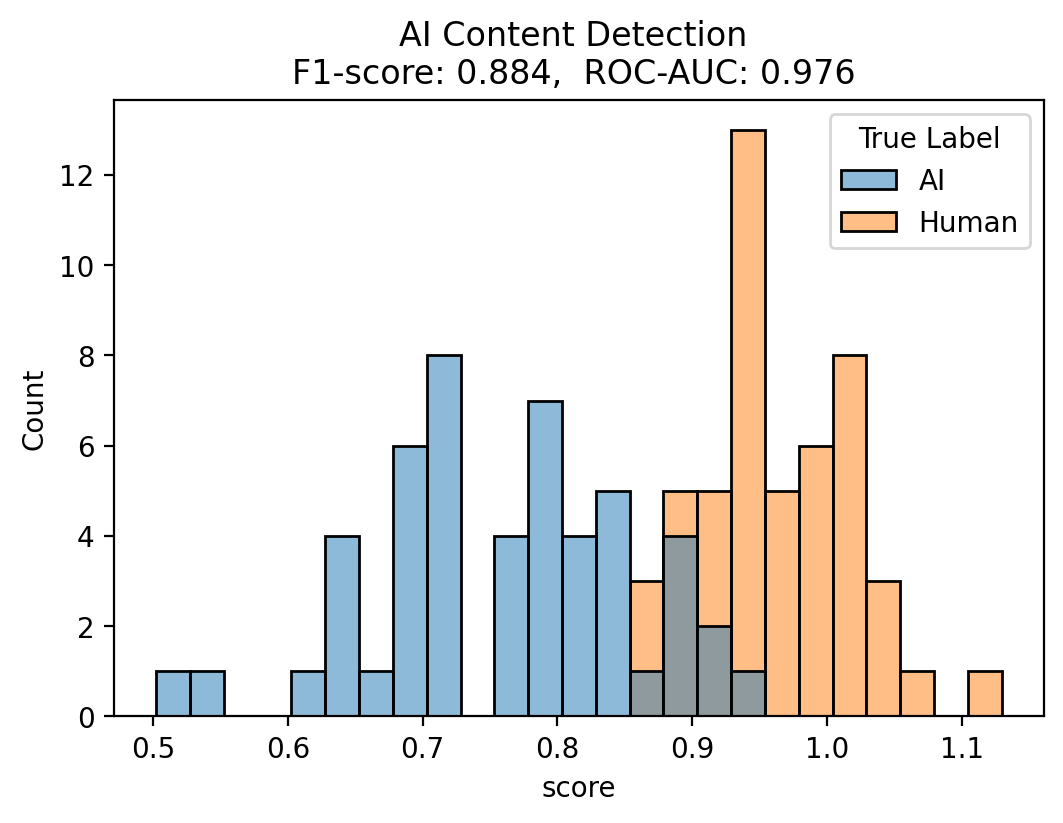

In [89]:
from sklearn.metrics import roc_auc_score, f1_score
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6,4), dpi=200)

auc = roc_auc_score(df['True Label'], df['score'])
f1 = f1_score(df['True Label']=='Human', df.pred=='Human')

seaborn.histplot(df, x='score', bins=25, hue='True Label')
plt.title(f"AI Content Detection \nF1-score: {f1:.3f},  ROC-AUC: {auc:.3f} ")
plt.savefig('score.png', bbox_inches='tight')

In [40]:
from IPython.display import display, Markdown

for idx, row in df.iterrows():
    if row['pred']=='AI' and row['confidence']>0.95:
        display(Markdown(row['colored_text']))

 The technology of the future will change <span style='background-color: #FFFF00'>our</span> lives in <span style='background-color: #FFFF00'>numerous</span> <span style='background-color: #FFFF00'>ways</span> . <span style='background-color: #FFFF00'>Here</span> are <span style='background-color: #FFFF00'>just</span> a few ways <span style='background-color: #FFFF00'>it</span> will <span style='background-color: #FFFF00'>do</span> so :   <span style='background-color: #FFFF00'>1</span> . <span style='background-color: #FFFF00'>Smart</span> <span style='background-color: #FFFF00'>Homes</span> : <span style='background-color: #FFFF00'>Smart</span> <span style='background-color: #FFFF00'>homes</span> will become increasingly <span style='background-color: #FFFF00'>popular</span> , using the <span style='background-color: #FFFF00'>internet</span> of things to control <span style='background-color: #FFFF00'>all</span> <span style='background-color: #FFFF00'>aspects</span> of the household . This includes <span style='background-color: #FFFF00'>lighting</span> , <span style='background-color: #FFFF00'>heating</span> , security <span style='background-color: #FFFF00'>systems</span> , and appliances  all of which <span style='background-color: #FFFF00'>will</span> be <span style='background-color: #FFFF00'>able</span> to <span style='background-color: #FFFF00'>be</span> controlled <span style='background-color: #FFFF00'>from</span> a single device or even with <span style='background-color: #FFFF00'>voice</span> <span style='background-color: #FFFF00'>commands</span> .   <span style='background-color: #FFFF00'>2</span> . <span style='background-color: #FFFF00'>Healthcare</span> : <span style='background-color: #FFFF00'>Advances</span> in <span style='background-color: #FFFF00'>technology</span> will make <span style='background-color: #FFFF00'>it</span> easier to monitor <span style='background-color: #FFFF00'>our</span> <span style='background-color: #FFFF00'>health</span> and <span style='background-color: #FFFF00'>well</span> being <span style='background-color: #FFFF00'>using</span> <span style='background-color: #FFFF00'>wearable</span> <span style='background-color: #FFFF00'>devices</span> and <span style='background-color: #FFFF00'>mobile</span> <span style='background-color: #FFFF00'>apps</span> . <span style='background-color: #FFFF00'>This</span> will <span style='background-color: #FFFF00'>enable</span> <span style='background-color: #FFFF00'>us</span> to detect and treat illnesses earlier and to <span style='background-color: #FFFF00'>live</span> healthier <span style='background-color: #FFFF00'>lifestyles</span> .   <span style='background-color: #FFFF00'>3</span> . <span style='background-color: #FFFF00'>Transportation</span> : <span style='background-color: #FFFF00'>Self</span> <span style='background-color: #FFFF00'>driving</span> <span style='background-color: #FFFF00'>cars</span> <span style='background-color: #FFFF00'>will</span> <span style='background-color: #FFFF00'>become</span> <span style='background-color: #FFFF00'>more</span> <span style='background-color: #FFFF00'>common</span> , and <span style='background-color: #FFFF00'>this</span> will <span style='background-color: #FFFF00'>reduce</span> the <span style='background-color: #FFFF00'>number</span> of <span style='background-color: #FFFF00'>car</span> accidents , <span style='background-color: #FFFF00'>ease</span> <span style='background-color: #FFFF00'>traffic</span> <span style='background-color: #FFFF00'>congestion</span> , and provide more convenient <span style='background-color: #FFFF00'>transportation</span> <span style='background-color: #FFFF00'>options</span> for people who <span style='background-color: #FFFF00'>cannot</span> drive .   <span style='background-color: #FFFF00'>4</span> . <span style='background-color: #FFFF00'>Aug</span> mented and <span style='background-color: #FFFF00'>Virtual</span> <span style='background-color: #FFFF00'>Reality</span> : <span style='background-color: #FFFF00'>These</span> <span style='background-color: #FFFF00'>technologies</span> will <span style='background-color: #FFFF00'>become</span> more <span style='background-color: #FFFF00'>advanced</span> , and will <span style='background-color: #FFFF00'>be</span> used for a <span style='background-color: #FFFF00'>wide</span> <span style='background-color: #FFFF00'>range</span> of applications <span style='background-color: #FFFF00'>such</span> as <span style='background-color: #FFFF00'>gaming</span> , <span style='background-color: #FFFF00'>education</span> , <span style='background-color: #FFFF00'>training</span> , and even shopping . <span style='background-color: #FFFF00'>It</span> will <span style='background-color: #FFFF00'>be</span> <span style='background-color: #FFFF00'>possible</span> to <span style='background-color: #FFFF00'>immer</span> <span style='background-color: #FFFF00'>se</span> <span style='background-color: #FFFF00'>ourselves</span> in <span style='background-color: #FFFF00'>completely</span> <span style='background-color: #FFFF00'>new</span> <span style='background-color: #FFFF00'>worlds</span> and have <span style='background-color: #FFFF00'>experiences</span> that <span style='background-color: #FFFF00'>were</span> previously <span style='background-color: #FFFF00'>only</span> <span style='background-color: #FFFF00'>possible</span> in <span style='background-color: #FFFF00'>our</span> <span style='background-color: #FFFF00'>imag</span> <span style='background-color: #FFFF00'>inations</span> .   <span style='background-color: #FFFF00'>5</span> . <span style='background-color: #FFFF00'>Environment</span> : <span style='background-color: #FFFF00'>Technology</span> <span style='background-color: #FFFF00'>will</span> <span style='background-color: #FFFF00'>help</span> <span style='background-color: #FFFF00'>us</span> to better manage and <span style='background-color: #FFFF00'>control</span> our <span style='background-color: #FFFF00'>impact</span> on the <span style='background-color: #FFFF00'>environment</span> . <span style='background-color: #FFFF00'>For</span> <span style='background-color: #FFFF00'>example</span> , <span style='background-color: #FFFF00'>renewable</span> <span style='background-color: #FFFF00'>energy</span> sources <span style='background-color: #FFFF00'>such</span> <span style='background-color: #FFFF00'>as</span> <span style='background-color: #FFFF00'>solar</span> and <span style='background-color: #FFFF00'>wind</span> <span style='background-color: #FFFF00'>power</span> <span style='background-color: #FFFF00'>will</span> <span style='background-color: #FFFF00'>become</span> more efficient , and smart <span style='background-color: #FFFF00'>cities</span> will <span style='background-color: #FFFF00'>use</span> data to optimize <span style='background-color: #FFFF00'>resource</span> <span style='background-color: #FFFF00'>usage</span> and <span style='background-color: #FFFF00'>reduce</span> <span style='background-color: #FFFF00'>waste</span> .  <span style='background-color: #FFFF00'>Overall</span> , the <span style='background-color: #FFFF00'>technology</span> of the <span style='background-color: #FFFF00'>future</span> will <span style='background-color: #FFFF00'>make</span> <span style='background-color: #FFFF00'>our</span> lives <span style='background-color: #FFFF00'>more</span> <span style='background-color: #FFFF00'>convenient</span> , <span style='background-color: #FFFF00'>efficient</span> , <span style='background-color: #FFFF00'>healthy</span> , and <span style='background-color: #FFFF00'>enjoyable</span> . <span style='background-color: #FFFF00'>However</span> , it is <span style='background-color: #FFFF00'>important</span> to <span style='background-color: #FFFF00'>ensure</span> that these <span style='background-color: #FFFF00'>advances</span> <span style='background-color: #FFFF00'>are</span> <span style='background-color: #FFFF00'>used</span> <span style='background-color: #FFFF00'>responsibly</span> and <span style='background-color: #FFFF00'>that</span> they <span style='background-color: #FFFF00'>benefit</span> everyone

 # The <span style='background-color: #FFFF00'>Impact</span> of Global <span style='background-color: #FFFF00'>W</span> <span style='background-color: #FFFF00'>arming</span> on the Environment  <span style='background-color: #FFFF00'>Global</span> warming is a phenomenon that has been <span style='background-color: #FFFF00'>affecting</span> the <span style='background-color: #FFFF00'>environment</span> for <span style='background-color: #FFFF00'>decades</span> . The <span style='background-color: #FFFF00'>increase</span> in the <span style='background-color: #FFFF00'>average</span> <span style='background-color: #FFFF00'>temperature</span> of the <span style='background-color: #FFFF00'>Earth</span> 's atmosphere is causing <span style='background-color: #FFFF00'>significant</span> <span style='background-color: #FFFF00'>changes</span> in the <span style='background-color: #FFFF00'>climate</span> , <span style='background-color: #FFFF00'>ecosystems</span> , and <span style='background-color: #FFFF00'>biodiversity</span> . <span style='background-color: #FFFF00'>In</span> this <span style='background-color: #FFFF00'>report</span> , <span style='background-color: #FFFF00'>we</span> <span style='background-color: #FFFF00'>will</span> discuss two significant <span style='background-color: #FFFF00'>effects</span> of <span style='background-color: #FFFF00'>global</span> <span style='background-color: #FFFF00'>warming</span> on the environment and provide suggestions on how individuals and <span style='background-color: #FFFF00'>communities</span> can <span style='background-color: #FFFF00'>take</span> <span style='background-color: #FFFF00'>action</span> to <span style='background-color: #FFFF00'>mitigate</span> its effects . ## <span style='background-color: #FFFF00'>Effect</span>  <span style='background-color: #FFFF00'>1</span> : <span style='background-color: #FFFF00'>Mel</span> <span style='background-color: #FFFF00'>ting</span> of <span style='background-color: #FFFF00'>Gl</span> <span style='background-color: #FFFF00'>ac</span> <span style='background-color: #FFFF00'>iers</span> and <span style='background-color: #FFFF00'>Rising</span> <span style='background-color: #FFFF00'>Sea</span> <span style='background-color: #FFFF00'>Levels</span>  <span style='background-color: #FFFF00'>One</span> of the most <span style='background-color: #FFFF00'>significant</span> <span style='background-color: #FFFF00'>effects</span> of <span style='background-color: #FFFF00'>global</span> <span style='background-color: #FFFF00'>warming</span> <span style='background-color: #FFFF00'>is</span> the <span style='background-color: #FFFF00'>melting</span> of <span style='background-color: #FFFF00'>glaciers</span> and <span style='background-color: #FFFF00'>ice</span> caps , which is <span style='background-color: #FFFF00'>causing</span> <span style='background-color: #FFFF00'>sea</span> <span style='background-color: #FFFF00'>levels</span> to <span style='background-color: #FFFF00'>rise</span> . <span style='background-color: #FFFF00'>According</span> to <span style='background-color: #FFFF00'>NASA</span> , <span style='background-color: #FFFF00'>sea</span> <span style='background-color: #FFFF00'>levels</span> <span style='background-color: #FFFF00'>have</span> <span style='background-color: #FFFF00'>risen</span> by <span style='background-color: #FFFF00'>approximately</span>  <span style='background-color: #FFFF00'>8</span> inches ( <span style='background-color: #FFFF00'>21</span> <span style='background-color: #FFFF00'>cm</span> ) <span style='background-color: #FFFF00'>since</span>  <span style='background-color: #FFFF00'>188</span> 0 , and the <span style='background-color: #FFFF00'>rate</span> of <span style='background-color: #FFFF00'>rise</span> <span style='background-color: #FFFF00'>is</span> <span style='background-color: #FFFF00'>accelerating</span> . This <span style='background-color: #FFFF00'>rise</span> in <span style='background-color: #FFFF00'>sea</span> <span style='background-color: #FFFF00'>levels</span> is <span style='background-color: #FFFF00'>causing</span> coastal <span style='background-color: #FFFF00'>flooding</span> , <span style='background-color: #FFFF00'>erosion</span> , and <span style='background-color: #FFFF00'>salt</span> <span style='background-color: #FFFF00'>water</span> <span style='background-color: #FFFF00'>intrusion</span> <span style='background-color: #FFFF00'>into</span> <span style='background-color: #FFFF00'>freshwater</span> sources . <span style='background-color: #FFFF00'>For</span> <span style='background-color: #FFFF00'>example</span> , in <span style='background-color: #FFFF00'>Bangladesh</span> , <span style='background-color: #FFFF00'>rising</span> <span style='background-color: #FFFF00'>sea</span> levels are causing <span style='background-color: #FFFF00'>salt</span> water <span style='background-color: #FFFF00'>intrusion</span> into the <span style='background-color: #FFFF00'>country</span> <span style='background-color: #FFFF00'>'s</span> <span style='background-color: #FFFF00'>freshwater</span> <span style='background-color: #FFFF00'>sources</span> , <span style='background-color: #FFFF00'>which</span> <span style='background-color: #FFFF00'>is</span> affecting <span style='background-color: #FFFF00'>agriculture</span> and <span style='background-color: #FFFF00'>drinking</span> water <span style='background-color: #FFFF00'>supplies</span> . In the <span style='background-color: #FFFF00'>United</span> <span style='background-color: #FFFF00'>States</span> , coastal flooding <span style='background-color: #FFFF00'>caused</span> by <span style='background-color: #FFFF00'>rising</span> <span style='background-color: #FFFF00'>sea</span> <span style='background-color: #FFFF00'>levels</span> is becoming <span style='background-color: #FFFF00'>more</span> frequent and <span style='background-color: #FFFF00'>severe</span> , <span style='background-color: #FFFF00'>causing</span> <span style='background-color: #FFFF00'>damage</span> to <span style='background-color: #FFFF00'>infrastructure</span> and homes . <span style='background-color: #FFFF00'>##</span> <span style='background-color: #FFFF00'>Effect</span>  <span style='background-color: #FFFF00'>2</span> : <span style='background-color: #FFFF00'>Changes</span> in <span style='background-color: #FFFF00'>E</span> <span style='background-color: #FFFF00'>cosystem</span> <span style='background-color: #FFFF00'>s</span> and <span style='background-color: #FFFF00'>B</span> <span style='background-color: #FFFF00'>iod</span> <span style='background-color: #FFFF00'>iversity</span>  <span style='background-color: #FFFF00'>Global</span> <span style='background-color: #FFFF00'>warming</span> is causing <span style='background-color: #FFFF00'>changes</span> in <span style='background-color: #FFFF00'>ecosystems</span> and <span style='background-color: #FFFF00'>biodiversity</span> , <span style='background-color: #FFFF00'>which</span> <span style='background-color: #FFFF00'>is</span> <span style='background-color: #FFFF00'>affecting</span> the survival of many <span style='background-color: #FFFF00'>species</span> . <span style='background-color: #FFFF00'>For</span> <span style='background-color: #FFFF00'>example</span> , the Arctic <span style='background-color: #FFFF00'>sea</span> <span style='background-color: #FFFF00'>ice</span> <span style='background-color: #FFFF00'>is</span> melting , causing <span style='background-color: #FFFF00'>polar</span> <span style='background-color: #FFFF00'>bears</span> to <span style='background-color: #FFFF00'>lose</span> their <span style='background-color: #FFFF00'>habitat</span> and <span style='background-color: #FFFF00'>food</span> <span style='background-color: #FFFF00'>sources</span> . The <span style='background-color: #FFFF00'>warmer</span> <span style='background-color: #FFFF00'>temperatures</span> <span style='background-color: #FFFF00'>are</span> also causing coral <span style='background-color: #FFFF00'>reefs</span> to <span style='background-color: #FFFF00'>bleach</span> and <span style='background-color: #FFFF00'>die</span> , <span style='background-color: #FFFF00'>which</span> <span style='background-color: #FFFF00'>is</span> <span style='background-color: #FFFF00'>affecting</span> the marine ecosystem . <span style='background-color: #FFFF00'>According</span> to the <span style='background-color: #FFFF00'>Int</span> <span style='background-color: #FFFF00'>erg</span> <span style='background-color: #FFFF00'>overnment</span> <span style='background-color: #FFFF00'>al</span> <span style='background-color: #FFFF00'>Panel</span> on <span style='background-color: #FFFF00'>Climate</span> <span style='background-color: #FFFF00'>Change</span> ( <span style='background-color: #FFFF00'>IP</span> <span style='background-color: #FFFF00'>CC</span> ), <span style='background-color: #FFFF00'>up</span> to  <span style='background-color: #FFFF00'>30</span> % of species could be at <span style='background-color: #FFFF00'>risk</span> of extinction <span style='background-color: #FFFF00'>if</span> global <span style='background-color: #FFFF00'>temperatures</span> <span style='background-color: #FFFF00'>rise</span> <span style='background-color: #FFFF00'>by</span>  <span style='background-color: #FFFF00'>1</span> . <span style='background-color: #FFFF00'>5</span> °C <span style='background-color: #FFFF00'>above</span> <span style='background-color: #FFFF00'>pre</span> <span style='background-color: #FFFF00'>ind</span> <span style='background-color: #FFFF00'>ustrial</span> levels . ## Mit <span style='background-color: #FFFF00'>ig</span> <span style='background-color: #FFFF00'>ating</span> the <span style='background-color: #FFFF00'>Effects</span> of <span style='background-color: #FFFF00'>Global</span> <span style='background-color: #FFFF00'>W</span> <span style='background-color: #FFFF00'>arming</span>  <span style='background-color: #FFFF00'>To</span> <span style='background-color: #FFFF00'>mitigate</span> the <span style='background-color: #FFFF00'>effects</span> of <span style='background-color: #FFFF00'>global</span> <span style='background-color: #FFFF00'>warming</span> , <span style='background-color: #FFFF00'>individuals</span> and <span style='background-color: #FFFF00'>communities</span> <span style='background-color: #FFFF00'>can</span> take <span style='background-color: #FFFF00'>action</span> in <span style='background-color: #FFFF00'>several</span> ways , <span style='background-color: #FFFF00'>including</span> :  <span style='background-color: #FFFF00'>Red</span> ucing <span style='background-color: #FFFF00'>carbon</span> <span style='background-color: #FFFF00'>emissions</span> <span style='background-color: #FFFF00'>by</span> <span style='background-color: #FFFF00'>using</span> <span style='background-color: #FFFF00'>renewable</span> <span style='background-color: #FFFF00'>energy</span> <span style='background-color: #FFFF00'>sources</span> , <span style='background-color: #FFFF00'>such</span> <span style='background-color: #FFFF00'>as</span> <span style='background-color: #FFFF00'>solar</span> and <span style='background-color: #FFFF00'>wind</span> power .  <span style='background-color: #FFFF00'>Cons</span> <span style='background-color: #FFFF00'>erving</span> <span style='background-color: #FFFF00'>energy</span> <span style='background-color: #FFFF00'>by</span> <span style='background-color: #FFFF00'>using</span> <span style='background-color: #FFFF00'>energy</span> <span style='background-color: #FFFF00'>efficient</span> appliances , <span style='background-color: #FFFF00'>turning</span> <span style='background-color: #FFFF00'>off</span> lights and <span style='background-color: #FFFF00'>electronics</span> <span style='background-color: #FFFF00'>when</span> <span style='background-color: #FFFF00'>not</span> in <span style='background-color: #FFFF00'>use</span> , and reducing car <span style='background-color: #FFFF00'>usage</span> .  <span style='background-color: #FFFF00'>Plant</span> <span style='background-color: #FFFF00'>ing</span> trees , <span style='background-color: #FFFF00'>which</span> <span style='background-color: #FFFF00'>absorb</span> <span style='background-color: #FFFF00'>carbon</span> <span style='background-color: #FFFF00'>dioxide</span> <span style='background-color: #FFFF00'>from</span> the atmosphere .  Supporting <span style='background-color: #FFFF00'>policies</span> and <span style='background-color: #FFFF00'>initiatives</span> that <span style='background-color: #FFFF00'>reduce</span> <span style='background-color: #FFFF00'>greenhouse</span> <span style='background-color: #FFFF00'>gas</span> <span style='background-color: #FFFF00'>emissions</span> and promote <span style='background-color: #FFFF00'>sustainability</span> . <span style='background-color: #FFFF00'>In</span> <span style='background-color: #FFFF00'>conclusion</span> , <span style='background-color: #FFFF00'>global</span> <span style='background-color: #FFFF00'>warming</span> is <span style='background-color: #FFFF00'>causing</span> <span style='background-color: #FFFF00'>significant</span> <span style='background-color: #FFFF00'>changes</span> in the <span style='background-color: #FFFF00'>environment</span> , <span style='background-color: #FFFF00'>including</span> the <span style='background-color: #FFFF00'>melting</span> of <span style='background-color: #FFFF00'>glaciers</span> and <span style='background-color: #FFFF00'>ice</span> <span style='background-color: #FFFF00'>caps</span> , <span style='background-color: #FFFF00'>rising</span> <span style='background-color: #FFFF00'>sea</span> <span style='background-color: #FFFF00'>levels</span> , and <span style='background-color: #FFFF00'>changes</span> in <span style='background-color: #FFFF00'>ecosystems</span> and <span style='background-color: #FFFF00'>biodiversity</span> . <span style='background-color: #FFFF00'>To</span> mitigate <span style='background-color: #FFFF00'>its</span> <span style='background-color: #FFFF00'>effects</span> , <span style='background-color: #FFFF00'>individuals</span> and communities <span style='background-color: #FFFF00'>can</span> <span style='background-color: #FFFF00'>take</span> <span style='background-color: #FFFF00'>action</span> <span style='background-color: #FFFF00'>by</span> <span style='background-color: #FFFF00'>reducing</span> <span style='background-color: #FFFF00'>carbon</span> <span style='background-color: #FFFF00'>emissions</span> , <span style='background-color: #FFFF00'>conserv</span> <span style='background-color: #FFFF00'>ing</span> <span style='background-color: #FFFF00'>energy</span> , <span style='background-color: #FFFF00'>planting</span> <span style='background-color: #FFFF00'>trees</span> , and supporting <span style='background-color: #FFFF00'>sustainability</span> initiatives

 Temperature <span style='background-color: #FFFF00'>has</span> a <span style='background-color: #FFFF00'>direct</span> <span style='background-color: #FFFF00'>impact</span> on the <span style='background-color: #FFFF00'>rate</span> of <span style='background-color: #FFFF00'>enzym</span> <span style='background-color: #FFFF00'>atic</span> reactions in <span style='background-color: #FFFF00'>living</span> organisms , so a <span style='background-color: #FFFF00'>change</span> in temperature may <span style='background-color: #FFFF00'>result</span> in an <span style='background-color: #FFFF00'>increase</span> or <span style='background-color: #FFFF00'>decrease</span> in the <span style='background-color: #FFFF00'>organism</span> <span style='background-color: #FFFF00'>'s</span> metabolic <span style='background-color: #FFFF00'>activity</span>

 <span style='background-color: #FFFF00'>One</span> of the <span style='background-color: #FFFF00'>biggest</span> challenges for the <span style='background-color: #FFFF00'>development</span> of <span style='background-color: #FFFF00'>AI</span> is to <span style='background-color: #FFFF00'>enable</span> <span style='background-color: #FFFF00'>machines</span> to <span style='background-color: #FFFF00'>process</span> and analyze <span style='background-color: #FFFF00'>natural</span> language at the <span style='background-color: #FFFF00'>same</span> <span style='background-color: #FFFF00'>level</span> <span style='background-color: #FFFF00'>as</span> humans do , and to make them <span style='background-color: #FFFF00'>capable</span> of <span style='background-color: #FFFF00'>critical</span> thinking , <span style='background-color: #FFFF00'>reasoning</span> , and <span style='background-color: #FFFF00'>creative</span> <span style='background-color: #FFFF00'>problem</span> <span style='background-color: #FFFF00'>solving</span>

 <span style='background-color: #FFFF00'>Verse</span>  1 : <span style='background-color: #FFFF00'>From</span> the <span style='background-color: #FFFF00'>moment</span> I saw <span style='background-color: #FFFF00'>your</span> face  The path of <span style='background-color: #FFFF00'>my</span> life <span style='background-color: #FFFF00'>made</span> a <span style='background-color: #FFFF00'>sudden</span> <span style='background-color: #FFFF00'>change</span>  I had <span style='background-color: #FFFF00'>no</span> <span style='background-color: #FFFF00'>idea</span> what love <span style='background-color: #FFFF00'>could</span> <span style='background-color: #FFFF00'>be</span>  <span style='background-color: #FFFF00'>Until</span> I <span style='background-color: #FFFF00'>saw</span> you <span style='background-color: #FFFF00'>loving</span> me  <span style='background-color: #FFFF00'>Ch</span> <span style='background-color: #FFFF00'>orus</span> : My <span style='background-color: #FFFF00'>love</span> , I will go the <span style='background-color: #FFFF00'>distance</span>  You and I will forever last  <span style='background-color: #FFFF00'>My</span> <span style='background-color: #FFFF00'>love</span> , <span style='background-color: #FFFF00'>I</span> will hold you <span style='background-color: #FFFF00'>close</span>  In <span style='background-color: #FFFF00'>my</span> heart <span style='background-color: #FFFF00'>our</span> <span style='background-color: #FFFF00'>love</span> will last  <span style='background-color: #FFFF00'>Verse</span>  <span style='background-color: #FFFF00'>2</span> : <span style='background-color: #FFFF00'>Our</span> love will be <span style='background-color: #FFFF00'>true</span> and never die  It 's <span style='background-color: #FFFF00'>like</span> a star in the sky  <span style='background-color: #FFFF00'>Fate</span> <span style='background-color: #FFFF00'>brought</span> <span style='background-color: #FFFF00'>us</span> together , I <span style='background-color: #FFFF00'>'m</span> so <span style='background-color: #FFFF00'>blessed</span>  You and I , a special recipe for success  <span style='background-color: #FFFF00'>Ch</span> <span style='background-color: #FFFF00'>orus</span> : <span style='background-color: #FFFF00'>My</span> <span style='background-color: #FFFF00'>love</span> , <span style='background-color: #FFFF00'>I</span> <span style='background-color: #FFFF00'>will</span> <span style='background-color: #FFFF00'>go</span> the <span style='background-color: #FFFF00'>distance</span>  <span style='background-color: #FFFF00'>You</span> and <span style='background-color: #FFFF00'>I</span> <span style='background-color: #FFFF00'>will</span> <span style='background-color: #FFFF00'>forever</span> <span style='background-color: #FFFF00'>last</span>  <span style='background-color: #FFFF00'>My</span> <span style='background-color: #FFFF00'>love</span> , <span style='background-color: #FFFF00'>I</span> <span style='background-color: #FFFF00'>will</span> <span style='background-color: #FFFF00'>hold</span> <span style='background-color: #FFFF00'>you</span> <span style='background-color: #FFFF00'>close</span>  <span style='background-color: #FFFF00'>In</span> <span style='background-color: #FFFF00'>my</span> <span style='background-color: #FFFF00'>heart</span> <span style='background-color: #FFFF00'>our</span> <span style='background-color: #FFFF00'>love</span> <span style='background-color: #FFFF00'>will</span> <span style='background-color: #FFFF00'>last</span>  <span style='background-color: #FFFF00'>Bridge</span> : As <span style='background-color: #FFFF00'>time</span> goes on , <span style='background-color: #FFFF00'>I</span> 'll never <span style='background-color: #FFFF00'>forget</span>  The moment our moments <span style='background-color: #FFFF00'>first</span> met  And as <span style='background-color: #FFFF00'>long</span> <span style='background-color: #FFFF00'>as</span> I 'm <span style='background-color: #FFFF00'>alive</span>  <span style='background-color: #FFFF00'>Our</span> <span style='background-color: #FFFF00'>love</span> will forever survive  <span style='background-color: #FFFF00'>Ch</span> <span style='background-color: #FFFF00'>orus</span> : <span style='background-color: #FFFF00'>My</span> <span style='background-color: #FFFF00'>love</span> , <span style='background-color: #FFFF00'>I</span> <span style='background-color: #FFFF00'>will</span> <span style='background-color: #FFFF00'>go</span> the <span style='background-color: #FFFF00'>distance</span>  <span style='background-color: #FFFF00'>You</span> and <span style='background-color: #FFFF00'>I</span> <span style='background-color: #FFFF00'>will</span> <span style='background-color: #FFFF00'>forever</span> <span style='background-color: #FFFF00'>last</span>  <span style='background-color: #FFFF00'>My</span> <span style='background-color: #FFFF00'>love</span> , <span style='background-color: #FFFF00'>I</span> <span style='background-color: #FFFF00'>will</span> <span style='background-color: #FFFF00'>hold</span> <span style='background-color: #FFFF00'>you</span> <span style='background-color: #FFFF00'>close</span>  <span style='background-color: #FFFF00'>In</span> <span style='background-color: #FFFF00'>my</span> <span style='background-color: #FFFF00'>heart</span> <span style='background-color: #FFFF00'>our</span> <span style='background-color: #FFFF00'>love</span> <span style='background-color: #FFFF00'>will</span> last

 You can use the <span style='background-color: #FFFF00'>IF</span> <span style='background-color: #FFFF00'>function</span> in <span style='background-color: #FFFF00'>Excel</span> to replace " <span style='background-color: #FFFF00'>now</span> " with an abbreviation . <span style='background-color: #FFFF00'>Here</span> 's an example formula <span style='background-color: #FFFF00'>you</span> <span style='background-color: #FFFF00'>can</span> use : = IF <span style='background-color: #FFFF00'>(B</span> <span style='background-color: #FFFF00'>2</span> <span style='background-color: #FFFF00'>="</span> now "," T BD <span style='background-color: #FFFF00'>",</span> <span style='background-color: #FFFF00'>B</span> <span style='background-color: #FFFF00'>2</span> ) <span style='background-color: #FFFF00'>This</span> formula <span style='background-color: #FFFF00'>checks</span> <span style='background-color: #FFFF00'>if</span> the <span style='background-color: #FFFF00'>value</span> in <span style='background-color: #FFFF00'>cell</span> <span style='background-color: #FFFF00'>B</span> <span style='background-color: #FFFF00'>2</span> <span style='background-color: #FFFF00'>is</span> " <span style='background-color: #FFFF00'>now</span> <span style='background-color: #FFFF00'>".</span> <span style='background-color: #FFFF00'>If</span> <span style='background-color: #FFFF00'>it</span> <span style='background-color: #FFFF00'>is</span> , it <span style='background-color: #FFFF00'>replaces</span> <span style='background-color: #FFFF00'>it</span> with " <span style='background-color: #FFFF00'>T</span> BD <span style='background-color: #FFFF00'>".</span> <span style='background-color: #FFFF00'>If</span> <span style='background-color: #FFFF00'>it</span> <span style='background-color: #FFFF00'>'s</span> <span style='background-color: #FFFF00'>not</span> , <span style='background-color: #FFFF00'>it</span> <span style='background-color: #FFFF00'>leaves</span> the <span style='background-color: #FFFF00'>original</span> value in place . <span style='background-color: #FFFF00'>You</span> can copy and <span style='background-color: #FFFF00'>paste</span> <span style='background-color: #FFFF00'>this</span> <span style='background-color: #FFFF00'>formula</span> into cells <span style='background-color: #FFFF00'>C</span> 2 and <span style='background-color: #FFFF00'>C</span> 3 to <span style='background-color: #FFFF00'>replace</span> " <span style='background-color: #FFFF00'>now</span> " with " <span style='background-color: #FFFF00'>T</span> <span style='background-color: #FFFF00'>BD</span> " or <span style='background-color: #FFFF00'>any</span> <span style='background-color: #FFFF00'>other</span> <span style='background-color: #FFFF00'>abbreviation</span> you prefer

 R ome <span style='background-color: #FFFF00'>o</span> and Juliet ' <span style='background-color: #FFFF00'>is</span> a tragic <span style='background-color: #FFFF00'>play</span> <span style='background-color: #FFFF00'>written</span> <span style='background-color: #FFFF00'>by</span> <span style='background-color: #FFFF00'>William</span> Shakespeare , <span style='background-color: #FFFF00'>set</span> in the <span style='background-color: #FFFF00'>city</span> of <span style='background-color: #FFFF00'>Ver</span> ona , <span style='background-color: #FFFF00'>Italy</span> . <span style='background-color: #FFFF00'>It</span> <span style='background-color: #FFFF00'>tells</span> the <span style='background-color: #FFFF00'>story</span> of <span style='background-color: #FFFF00'>two</span> <span style='background-color: #FFFF00'>young</span> <span style='background-color: #FFFF00'>lovers</span> <span style='background-color: #FFFF00'>from</span> <span style='background-color: #FFFF00'>fe</span> <span style='background-color: #FFFF00'>uding</span> families , Romeo <span style='background-color: #FFFF00'>Mont</span> <span style='background-color: #FFFF00'>ague</span> and <span style='background-color: #FFFF00'>Juliet</span> <span style='background-color: #FFFF00'>Cap</span> <span style='background-color: #FFFF00'>ulet</span> , <span style='background-color: #FFFF00'>who</span> <span style='background-color: #FFFF00'>fall</span> in love at <span style='background-color: #FFFF00'>first</span> sight . <span style='background-color: #FFFF00'>Despite</span> <span style='background-color: #FFFF00'>their</span> <span style='background-color: #FFFF00'>families</span> ' longstanding hatred , they <span style='background-color: #FFFF00'>secretly</span> marry with the <span style='background-color: #FFFF00'>help</span> of <span style='background-color: #FFFF00'>Fri</span> <span style='background-color: #FFFF00'>ar</span> Lawrence . <span style='background-color: #FFFF00'>However</span> , <span style='background-color: #FFFF00'>their</span> <span style='background-color: #FFFF00'>happiness</span> <span style='background-color: #FFFF00'>is</span> <span style='background-color: #FFFF00'>short</span> lived as Juliet is promised in <span style='background-color: #FFFF00'>marriage</span> to <span style='background-color: #FFFF00'>Count</span> Paris <span style='background-color: #FFFF00'>by</span> her father . <span style='background-color: #FFFF00'>To</span> <span style='background-color: #FFFF00'>avoid</span> this <span style='background-color: #FFFF00'>marriage</span> , she <span style='background-color: #FFFF00'>takes</span> a <span style='background-color: #FFFF00'>sleeping</span> potion <span style='background-color: #FFFF00'>that</span> makes <span style='background-color: #FFFF00'>it</span> <span style='background-color: #FFFF00'>seem</span> <span style='background-color: #FFFF00'>like</span> <span style='background-color: #FFFF00'>she</span> <span style='background-color: #FFFF00'>is</span> dead . Romeo , believing <span style='background-color: #FFFF00'>she</span> is <span style='background-color: #FFFF00'>truly</span> <span style='background-color: #FFFF00'>dead</span> , <span style='background-color: #FFFF00'>drinks</span> poison and dies <span style='background-color: #FFFF00'>by</span> <span style='background-color: #FFFF00'>her</span> <span style='background-color: #FFFF00'>side</span> . Juliet wakes to find <span style='background-color: #FFFF00'>him</span> <span style='background-color: #FFFF00'>dead</span> and then <span style='background-color: #FFFF00'>st</span> <span style='background-color: #FFFF00'>abs</span> <span style='background-color: #FFFF00'>herself</span> with <span style='background-color: #FFFF00'>his</span> dagger . <span style='background-color: #FFFF00'>The</span> <span style='background-color: #FFFF00'>tragic</span> end to <span style='background-color: #FFFF00'>their</span> <span style='background-color: #FFFF00'>love</span> story <span style='background-color: #FFFF00'>ultimately</span> brings <span style='background-color: #FFFF00'>their</span> <span style='background-color: #FFFF00'>families</span> together , <span style='background-color: #FFFF00'>as</span> they finally <span style='background-color: #FFFF00'>end</span> <span style='background-color: #FFFF00'>their</span> feud

 The Swedish company <span style='background-color: #FFFF00'>Elect</span> <span style='background-color: #FFFF00'>rol</span> ux announced <span style='background-color: #FFFF00'>yesterday</span> <span style='background-color: #FFFF00'>that</span> it <span style='background-color: #FFFF00'>plans</span> to move <span style='background-color: #FFFF00'>production</span> of <span style='background-color: #FFFF00'>washing</span> machines from <span style='background-color: #FFFF00'>Sweden</span> to Poland , in a <span style='background-color: #FFFF00'>move</span> that will see <span style='background-color: #FFFF00'>around</span>  <span style='background-color: #FFFF00'>2</span> , <span style='background-color: #FFFF00'>000</span> <span style='background-color: #FFFF00'>jobs</span> <span style='background-color: #FFFF00'>lost</span> in Europe . <span style='background-color: #FFFF00'>The</span> company <span style='background-color: #FFFF00'>said</span> <span style='background-color: #FFFF00'>that</span> the <span style='background-color: #FFFF00'>decision</span> <span style='background-color: #FFFF00'>was</span> made in <span style='background-color: #FFFF00'>order</span> to " <span style='background-color: #FFFF00'>remain</span> competitive ", and <span style='background-color: #FFFF00'>that</span> the jobs <span style='background-color: #FFFF00'>would</span> be <span style='background-color: #FFFF00'>moved</span> to a " <span style='background-color: #FFFF00'>lower</span> cost <span style='background-color: #FFFF00'>country</span> ".  This news will <span style='background-color: #FFFF00'>come</span> <span style='background-color: #FFFF00'>as</span> a <span style='background-color: #FFFF00'>huge</span> <span style='background-color: #FFFF00'>blow</span> to the workers <span style='background-color: #FFFF00'>who</span> will <span style='background-color: #FFFF00'>lose</span> <span style='background-color: #FFFF00'>their</span> <span style='background-color: #FFFF00'>jobs</span> , and to the Swedish economy <span style='background-color: #FFFF00'>more</span> <span style='background-color: #FFFF00'>broadly</span> . It is yet <span style='background-color: #FFFF00'>another</span> <span style='background-color: #FFFF00'>example</span> of how <span style='background-color: #FFFF00'>globalization</span> and the <span style='background-color: #FFFF00'>race</span> to the <span style='background-color: #FFFF00'>bottom</span> in <span style='background-color: #FFFF00'>terms</span> of <span style='background-color: #FFFF00'>labour</span> costs is damaging European industry . While <span style='background-color: #FFFF00'>companies</span> <span style='background-color: #FFFF00'>like</span> <span style='background-color: #FFFF00'>Elect</span> <span style='background-color: #FFFF00'>rol</span> ux are <span style='background-color: #FFFF00'>able</span> to <span style='background-color: #FFFF00'>move</span> <span style='background-color: #FFFF00'>production</span> to wherever <span style='background-color: #FFFF00'>is</span> <span style='background-color: #FFFF00'>cheapest</span> , workers <span style='background-color: #FFFF00'>are</span> left behind , with little <span style='background-color: #FFFF00'>prospect</span> of <span style='background-color: #FFFF00'>finding</span> <span style='background-color: #FFFF00'>new</span> employment .  <span style='background-color: #FFFF00'>It</span> is <span style='background-color: #FFFF00'>time</span> for the <span style='background-color: #FFFF00'>European</span> <span style='background-color: #FFFF00'>Union</span> to <span style='background-color: #FFFF00'>take</span> <span style='background-color: #FFFF00'>action</span> to protect its <span style='background-color: #FFFF00'>industries</span> and workers from this <span style='background-color: #FFFF00'>damaging</span> <span style='background-color: #FFFF00'>trend</span> . <span style='background-color: #FFFF00'>We</span> <span style='background-color: #FFFF00'>need</span> to <span style='background-color: #FFFF00'>see</span> a <span style='background-color: #FFFF00'>level</span> <span style='background-color: #FFFF00'>playing</span> <span style='background-color: #FFFF00'>field</span> , <span style='background-color: #FFFF00'>where</span> <span style='background-color: #FFFF00'>companies</span> <span style='background-color: #FFFF00'>are</span> <span style='background-color: #FFFF00'>not</span> <span style='background-color: #FFFF00'>able</span> to exploit <span style='background-color: #FFFF00'>workers</span> in <span style='background-color: #FFFF00'>other</span> countries in <span style='background-color: #FFFF00'>order</span> to <span style='background-color: #FFFF00'>lower</span> their <span style='background-color: #FFFF00'>own</span> <span style='background-color: #FFFF00'>costs</span> . <span style='background-color: #FFFF00'>Otherwise</span> , <span style='background-color: #FFFF00'>we</span> will <span style='background-color: #FFFF00'>continue</span> to see <span style='background-color: #FFFF00'>jobs</span> and businesses lost , to the <span style='background-color: #FFFF00'>detriment</span> of <span style='background-color: #FFFF00'>us</span> <span style='background-color: #FFFF00'>all</span>

 <span style='background-color: #FFFF00'>Yes</span> , definitely . In C ++, a <span style='background-color: #FFFF00'>try</span> <span style='background-color: #FFFF00'>c</span> <span style='background-color: #FFFF00'>atch</span> block <span style='background-color: #FFFF00'>is</span> <span style='background-color: #FFFF00'>used</span> to <span style='background-color: #FFFF00'>handle</span> exceptions that <span style='background-color: #FFFF00'>can</span> <span style='background-color: #FFFF00'>occur</span> during <span style='background-color: #FFFF00'>program</span> <span style='background-color: #FFFF00'>execution</span> . <span style='background-color: #FFFF00'>Exceptions</span> are unexpected <span style='background-color: #FFFF00'>situations</span> that occur while a <span style='background-color: #FFFF00'>program</span> <span style='background-color: #FFFF00'>is</span> <span style='background-color: #FFFF00'>running</span> , <span style='background-color: #FFFF00'>such</span> as an unexpected input or a <span style='background-color: #FFFF00'>division</span> <span style='background-color: #FFFF00'>by</span> zero .  <span style='background-color: #FFFF00'>Here</span> is an example where a <span style='background-color: #FFFF00'>try</span> <span style='background-color: #FFFF00'>c</span> <span style='background-color: #FFFF00'>atch</span> block <span style='background-color: #FFFF00'>can</span> <span style='background-color: #FFFF00'>be</span> used to handle an unexpected outcome while ensuring the <span style='background-color: #FFFF00'>security</span> of the system . Suppose you are <span style='background-color: #FFFF00'>writing</span> a <span style='background-color: #FFFF00'>program</span> that reads <span style='background-color: #FFFF00'>user</span> input and performs a calculation on <span style='background-color: #FFFF00'>it</span> . <span style='background-color: #FFFF00'>However</span> , <span style='background-color: #FFFF00'>if</span> the user inputs a <span style='background-color: #FFFF00'>negative</span> <span style='background-color: #FFFF00'>number</span> , the calculation could <span style='background-color: #FFFF00'>result</span> in an overflow or <span style='background-color: #FFFF00'>under</span> flow , <span style='background-color: #FFFF00'>which</span> could potentially <span style='background-color: #FFFF00'>lead</span> to a security vulnerability .  To <span style='background-color: #FFFF00'>handle</span> this <span style='background-color: #FFFF00'>situation</span> , <span style='background-color: #FFFF00'>you</span> <span style='background-color: #FFFF00'>can</span> <span style='background-color: #FFFF00'>use</span> a <span style='background-color: #FFFF00'>try</span> <span style='background-color: #FFFF00'>c</span> <span style='background-color: #FFFF00'>atch</span> <span style='background-color: #FFFF00'>block</span> to catch any <span style='background-color: #FFFF00'>exceptions</span> that occur when the user <span style='background-color: #FFFF00'>inputs</span> a <span style='background-color: #FFFF00'>negative</span> number . <span style='background-color: #FFFF00'>Here</span> <span style='background-color: #FFFF00'>is</span> an example code snippet : ``` # <span style='background-color: #FFFF00'>include</span> < <span style='background-color: #FFFF00'>iostream</span> > # <span style='background-color: #FFFF00'>include</span> < stdexcept > <span style='background-color: #FFFF00'>int</span> <span style='background-color: #FFFF00'>main</span> () {  int <span style='background-color: #FFFF00'>num</span> ;  <span style='background-color: #FFFF00'>std</span> <span style='background-color: #FFFF00'>::</span> <span style='background-color: #FFFF00'>cout</span> <span style='background-color: #FFFF00'><<</span> " <span style='background-color: #FFFF00'>Enter</span> a <span style='background-color: #FFFF00'>positive</span> <span style='background-color: #FFFF00'>number</span> : <span style='background-color: #FFFF00'>";</span>  <span style='background-color: #FFFF00'>std</span> <span style='background-color: #FFFF00'>::</span> <span style='background-color: #FFFF00'>cin</span> <span style='background-color: #FFFF00'>>></span> <span style='background-color: #FFFF00'>num</span> ;  <span style='background-color: #FFFF00'>try</span> {  <span style='background-color: #FFFF00'>if</span> ( <span style='background-color: #FFFF00'>num</span> <  <span style='background-color: #FFFF00'>0</span> ) {  <span style='background-color: #FFFF00'>throw</span> <span style='background-color: #FFFF00'>std</span> <span style='background-color: #FFFF00'>::</span> <span style='background-color: #FFFF00'>invalid</span> <span style='background-color: #FFFF00'>_argument</span> (" <span style='background-color: #FFFF00'>Negative</span> number <span style='background-color: #FFFF00'>entered</span> <span style='background-color: #FFFF00'>");</span>  }  // <span style='background-color: #FFFF00'>Perform</span> calculation with <span style='background-color: #FFFF00'>num</span>   }  <span style='background-color: #FFFF00'>catch</span> ( <span style='background-color: #FFFF00'>const</span> <span style='background-color: #FFFF00'>std</span> <span style='background-color: #FFFF00'>::</span> <span style='background-color: #FFFF00'>invalid</span> <span style='background-color: #FFFF00'>_argument</span> & <span style='background-color: #FFFF00'>e</span> ) {  <span style='background-color: #FFFF00'>std</span> <span style='background-color: #FFFF00'>::</span> <span style='background-color: #FFFF00'>cerr</span> <span style='background-color: #FFFF00'><<</span> " <span style='background-color: #FFFF00'>Error</span> : " <span style='background-color: #FFFF00'><<</span> <span style='background-color: #FFFF00'>e</span> <span style='background-color: #FFFF00'>.what</span> () <span style='background-color: #FFFF00'><<</span> <span style='background-color: #FFFF00'>std</span> <span style='background-color: #FFFF00'>::</span> <span style='background-color: #FFFF00'>endl</span> ;  // <span style='background-color: #FFFF00'>Handle</span> the error <span style='background-color: #FFFF00'>securely</span>   }  <span style='background-color: #FFFF00'>return</span>  <span style='background-color: #FFFF00'>0</span> ; } <span style='background-color: #FFFF00'>```</span> <span style='background-color: #FFFF00'>In</span> <span style='background-color: #FFFF00'>this</span> <span style='background-color: #FFFF00'>example</span> , <span style='background-color: #FFFF00'>if</span> the <span style='background-color: #FFFF00'>user</span> <span style='background-color: #FFFF00'>inputs</span> a <span style='background-color: #FFFF00'>negative</span> <span style='background-color: #FFFF00'>number</span> , the ` <span style='background-color: #FFFF00'>throw</span> ` statement will <span style='background-color: #FFFF00'>throw</span> an exception of <span style='background-color: #FFFF00'>type</span> ` <span style='background-color: #FFFF00'>std</span> <span style='background-color: #FFFF00'>::</span> <span style='background-color: #FFFF00'>invalid</span> <span style='background-color: #FFFF00'>_argument</span> <span style='background-color: #FFFF00'>`.</span> <span style='background-color: #FFFF00'>The</span> ` <span style='background-color: #FFFF00'>catch</span> ` block <span style='background-color: #FFFF00'>then</span> <span style='background-color: #FFFF00'>catches</span> <span style='background-color: #FFFF00'>this</span> <span style='background-color: #FFFF00'>exception</span> and <span style='background-color: #FFFF00'>prints</span> an <span style='background-color: #FFFF00'>error</span> <span style='background-color: #FFFF00'>message</span> to the <span style='background-color: #FFFF00'>console</span> . <span style='background-color: #FFFF00'>You</span> <span style='background-color: #FFFF00'>can</span> <span style='background-color: #FFFF00'>then</span> <span style='background-color: #FFFF00'>handle</span> the <span style='background-color: #FFFF00'>error</span> securely , <span style='background-color: #FFFF00'>such</span> <span style='background-color: #FFFF00'>as</span> by <span style='background-color: #FFFF00'>terminating</span> the <span style='background-color: #FFFF00'>program</span> or <span style='background-color: #FFFF00'>logging</span> the error .  <span style='background-color: #FFFF00'>By</span> <span style='background-color: #FFFF00'>using</span> a <span style='background-color: #FFFF00'>try</span> <span style='background-color: #FFFF00'>c</span> <span style='background-color: #FFFF00'>atch</span> <span style='background-color: #FFFF00'>block</span> , <span style='background-color: #FFFF00'>you</span> <span style='background-color: #FFFF00'>can</span> <span style='background-color: #FFFF00'>ensure</span> that unexpected inputs or <span style='background-color: #FFFF00'>outcomes</span> <span style='background-color: #FFFF00'>do</span> not <span style='background-color: #FFFF00'>compromise</span> the <span style='background-color: #FFFF00'>security</span> of your <span style='background-color: #FFFF00'>program</span>

 It <span style='background-color: #FFFF00'>not</span> only <span style='background-color: #FFFF00'>affects</span> the <span style='background-color: #FFFF00'>atmosphere</span> , but <span style='background-color: #FFFF00'>land</span> and water around us , <span style='background-color: #FFFF00'>as</span> <span style='background-color: #FFFF00'>well</span> <span style='background-color: #FFFF00'>as</span> the <span style='background-color: #FFFF00'>health</span> and <span style='background-color: #FFFF00'>well</span> <span style='background-color: #FFFF00'>being</span> of <span style='background-color: #FFFF00'>all</span> living organisms on the <span style='background-color: #FFFF00'>planet</span>

 Data <span style='background-color: #FFFF00'>augmentation</span> is important in <span style='background-color: #FFFF00'>machine</span> learning <span style='background-color: #FFFF00'>as</span> it <span style='background-color: #FFFF00'>helps</span> to <span style='background-color: #FFFF00'>reduce</span> <span style='background-color: #FFFF00'>over</span> <span style='background-color: #FFFF00'>fit</span> ting <span style='background-color: #FFFF00'>by</span> <span style='background-color: #FFFF00'>increasing</span> the <span style='background-color: #FFFF00'>size</span> of the dataset and <span style='background-color: #FFFF00'>enrich</span> <span style='background-color: #FFFF00'>ing</span> its <span style='background-color: #FFFF00'>features</span> . It also <span style='background-color: #FFFF00'>helps</span> to <span style='background-color: #FFFF00'>improve</span> the <span style='background-color: #FFFF00'>accuracy</span> of the <span style='background-color: #FFFF00'>model</span> by providing more <span style='background-color: #FFFF00'>relevant</span> data for the <span style='background-color: #FFFF00'>model</span> to <span style='background-color: #FFFF00'>learn</span> <span style='background-color: #FFFF00'>from</span> . By <span style='background-color: #FFFF00'>generating</span> <span style='background-color: #FFFF00'>new</span> data <span style='background-color: #FFFF00'>from</span> the <span style='background-color: #FFFF00'>original</span> <span style='background-color: #FFFF00'>data</span> , <span style='background-color: #FFFF00'>data</span> augmentation also <span style='background-color: #FFFF00'>helps</span> to reduce <span style='background-color: #FFFF00'>bias</span> in the dataset

 Just <span style='background-color: #FFFF00'>visited</span> the Ocean <span style='background-color: #FFFF00'>B</span> reeze Cafe , <span style='background-color: #FFFF00'>corner</span> of Main &  <span style='background-color: #FFFF00'>5</span> th . <span style='background-color: #FFFF00'>Delicious</span> <span style='background-color: #FFFF00'>food</span> and <span style='background-color: #FFFF00'>lots</span> of great <span style='background-color: #FFFF00'>atmosphere</span> . <span style='background-color: #FFFF00'>Highly</span> recommend <span style='background-color: #FFFF00'>checking</span> <span style='background-color: #FFFF00'>it</span> <span style='background-color: #FFFF00'>out</span> ! # <span style='background-color: #FFFF00'>o</span> <span style='background-color: #FFFF00'>cean</span> <span style='background-color: #FFFF00'>b</span> <span style='background-color: #FFFF00'>ree</span> <span style='background-color: #FFFF00'>z</span> <span style='background-color: #FFFF00'>ec</span> <span style='background-color: #FFFF00'>afe</span> # <span style='background-color: #FFFF00'>restaurant</span> <span style='background-color: #FFFF00'>review</span> # <span style='background-color: #FFFF00'>food</span> ie  # best <span style='background-color: #FFFF00'>e</span> ats  # food <span style='background-color: #FFFF00'>review</span>  # <span style='background-color: #FFFF00'>main</span>

 Three <span style='background-color: #FFFF00'>ways</span> to tackle <span style='background-color: #FFFF00'>climate</span> change are :  <span style='background-color: #FFFF00'>1</span> . <span style='background-color: #FFFF00'>Red</span> ucing emissions by <span style='background-color: #FFFF00'>switching</span> to cleaner <span style='background-color: #FFFF00'>sources</span> of energy , <span style='background-color: #FFFF00'>such</span> as <span style='background-color: #FFFF00'>renewable</span> energy <span style='background-color: #FFFF00'>sources</span> <span style='background-color: #FFFF00'>like</span> <span style='background-color: #FFFF00'>solar</span> and <span style='background-color: #FFFF00'>wind</span> power .   <span style='background-color: #FFFF00'>2</span> . <span style='background-color: #FFFF00'>Red</span> ucing the <span style='background-color: #FFFF00'>use</span> of <span style='background-color: #FFFF00'>fossil</span> fuels through <span style='background-color: #FFFF00'>energy</span> <span style='background-color: #FFFF00'>efficiency</span> measures <span style='background-color: #FFFF00'>such</span> as <span style='background-color: #FFFF00'>improved</span> <span style='background-color: #FFFF00'>insulation</span> and energy <span style='background-color: #FFFF00'>saving</span> <span style='background-color: #FFFF00'>appliances</span> .  <span style='background-color: #FFFF00'>3</span> . <span style='background-color: #FFFF00'>Enc</span> <span style='background-color: #FFFF00'>our</span> aging the <span style='background-color: #FFFF00'>adoption</span> of sustainable practices <span style='background-color: #FFFF00'>such</span> as <span style='background-color: #FFFF00'>waste</span> <span style='background-color: #FFFF00'>reduction</span> , sustainable farming and forestry , and carbon <span style='background-color: #FFFF00'>se</span> <span style='background-color: #FFFF00'>que</span> stration

 I 'm sorry , but I <span style='background-color: #FFFF00'>don</span> <span style='background-color: #FFFF00'>'t</span> have <span style='background-color: #FFFF00'>access</span> to <span style='background-color: #FFFF00'>specific</span> <span style='background-color: #FFFF00'>information</span> about a person 's coffee preferences unless it <span style='background-color: #FFFF00'>has</span> been previously provided to <span style='background-color: #FFFF00'>me</span> . <span style='background-color: #FFFF00'>However</span> , <span style='background-color: #FFFF00'>I</span> can provide <span style='background-color: #FFFF00'>general</span> <span style='background-color: #FFFF00'>information</span> <span style='background-color: #FFFF00'>about</span> coffee blends . <span style='background-color: #FFFF00'>Coffee</span> blends can be made <span style='background-color: #FFFF00'>up</span> of <span style='background-color: #FFFF00'>beans</span> from <span style='background-color: #FFFF00'>different</span> <span style='background-color: #FFFF00'>regions</span> , with varying <span style='background-color: #FFFF00'>degrees</span> of roast , to <span style='background-color: #FFFF00'>create</span> a <span style='background-color: #FFFF00'>unique</span> <span style='background-color: #FFFF00'>flavor</span> <span style='background-color: #FFFF00'>profile</span> . The <span style='background-color: #FFFF00'>origin</span> of the beans <span style='background-color: #FFFF00'>used</span> in a <span style='background-color: #FFFF00'>blend</span> can <span style='background-color: #FFFF00'>affect</span> the <span style='background-color: #FFFF00'>taste</span> , as <span style='background-color: #FFFF00'>different</span> regions <span style='background-color: #FFFF00'>produce</span> <span style='background-color: #FFFF00'>beans</span> with <span style='background-color: #FFFF00'>distinct</span> <span style='background-color: #FFFF00'>flavor</span> <span style='background-color: #FFFF00'>characteristics</span> . <span style='background-color: #FFFF00'>For</span> <span style='background-color: #FFFF00'>example</span> , <span style='background-color: #FFFF00'>beans</span> from Africa <span style='background-color: #FFFF00'>tend</span> to have a fruity and floral <span style='background-color: #FFFF00'>taste</span> , <span style='background-color: #FFFF00'>while</span> <span style='background-color: #FFFF00'>beans</span> <span style='background-color: #FFFF00'>from</span> <span style='background-color: #FFFF00'>South</span> America are more <span style='background-color: #FFFF00'>nut</span> <span style='background-color: #FFFF00'>ty</span> and <span style='background-color: #FFFF00'>chocol</span> <span style='background-color: #FFFF00'>aty</span> . Ro asting <span style='background-color: #FFFF00'>techniques</span> <span style='background-color: #FFFF00'>can</span> also <span style='background-color: #FFFF00'>impact</span> the <span style='background-color: #FFFF00'>flavor</span> of a <span style='background-color: #FFFF00'>coffee</span> <span style='background-color: #FFFF00'>blend</span> . Light <span style='background-color: #FFFF00'>ro</span> <span style='background-color: #FFFF00'>asts</span> <span style='background-color: #FFFF00'>tend</span> to <span style='background-color: #FFFF00'>have</span> a <span style='background-color: #FFFF00'>more</span> <span style='background-color: #FFFF00'>acidic</span> and fruity <span style='background-color: #FFFF00'>flavor</span> , while <span style='background-color: #FFFF00'>dark</span> <span style='background-color: #FFFF00'>ro</span> asts <span style='background-color: #FFFF00'>have</span> a <span style='background-color: #FFFF00'>b</span> <span style='background-color: #FFFF00'>older</span> , <span style='background-color: #FFFF00'>sm</span> <span style='background-color: #FFFF00'>ok</span> <span style='background-color: #FFFF00'>ier</span> <span style='background-color: #FFFF00'>taste</span> . <span style='background-color: #FFFF00'>Medium</span> <span style='background-color: #FFFF00'>ro</span> asts <span style='background-color: #FFFF00'>fall</span> <span style='background-color: #FFFF00'>somewhere</span> in between , with a <span style='background-color: #FFFF00'>balance</span> of <span style='background-color: #FFFF00'>acidity</span> and <span style='background-color: #FFFF00'>body</span> . The <span style='background-color: #FFFF00'>brewing</span> method used to <span style='background-color: #FFFF00'>prepare</span> the <span style='background-color: #FFFF00'>coffee</span> <span style='background-color: #FFFF00'>can</span> also <span style='background-color: #FFFF00'>affect</span> the <span style='background-color: #FFFF00'>taste</span> . <span style='background-color: #FFFF00'>For</span> <span style='background-color: #FFFF00'>example</span> , a <span style='background-color: #FFFF00'>French</span> press will <span style='background-color: #FFFF00'>produce</span> a <span style='background-color: #FFFF00'>full</span> <span style='background-color: #FFFF00'>bodied</span> <span style='background-color: #FFFF00'>coffee</span> with more <span style='background-color: #FFFF00'>sediment</span> , <span style='background-color: #FFFF00'>while</span> a <span style='background-color: #FFFF00'>pour</span> <span style='background-color: #FFFF00'>over</span> will <span style='background-color: #FFFF00'>create</span> a <span style='background-color: #FFFF00'>cleaner</span> , <span style='background-color: #FFFF00'>more</span> <span style='background-color: #FFFF00'>nuanced</span> <span style='background-color: #FFFF00'>flavor</span> . <span style='background-color: #FFFF00'>As</span> for additives and <span style='background-color: #FFFF00'>sweet</span> <span style='background-color: #FFFF00'>eners</span> , <span style='background-color: #FFFF00'>these</span> can be <span style='background-color: #FFFF00'>added</span> to taste . Some common <span style='background-color: #FFFF00'>options</span> <span style='background-color: #FFFF00'>include</span> <span style='background-color: #FFFF00'>sugar</span> , <span style='background-color: #FFFF00'>cream</span> , <span style='background-color: #FFFF00'>milk</span> , <span style='background-color: #FFFF00'>honey</span> , and <span style='background-color: #FFFF00'>flavored</span> <span style='background-color: #FFFF00'>sy</span> <span style='background-color: #FFFF00'>r</span> <span style='background-color: #FFFF00'>ups</span>

 Alice was always fascinated with the <span style='background-color: #FFFF00'>night</span> <span style='background-color: #FFFF00'>sky</span> . She often <span style='background-color: #FFFF00'>sn</span> <span style='background-color: #FFFF00'>uck</span> <span style='background-color: #FFFF00'>out</span> of her house <span style='background-color: #FFFF00'>late</span> at night <span style='background-color: #FFFF00'>just</span> to admire space in <span style='background-color: #FFFF00'>all</span> <span style='background-color: #FFFF00'>its</span> <span style='background-color: #FFFF00'>glory</span> . <span style='background-color: #FFFF00'>One</span> night she was out <span style='background-color: #FFFF00'>g</span> <span style='background-color: #FFFF00'>azing</span> at the <span style='background-color: #FFFF00'>stars</span> <span style='background-color: #FFFF00'>when</span> she <span style='background-color: #FFFF00'>noticed</span> a strange <span style='background-color: #FFFF00'>blue</span> light in the <span style='background-color: #FFFF00'>distance</span> . <span style='background-color: #FFFF00'>It</span> was moving closer to her , and <span style='background-color: #FFFF00'>before</span> <span style='background-color: #FFFF00'>she</span> <span style='background-color: #FFFF00'>knew</span> <span style='background-color: #FFFF00'>it</span> , <span style='background-color: #FFFF00'>she</span> was <span style='background-color: #FFFF00'>surrounded</span> <span style='background-color: #FFFF00'>by</span> a <span style='background-color: #FFFF00'>swarm</span> of tiny <span style='background-color: #FFFF00'>aliens</span> . They <span style='background-color: #FFFF00'>asked</span> her to <span style='background-color: #FFFF00'>come</span> with <span style='background-color: #FFFF00'>them</span> , and <span style='background-color: #FFFF00'>without</span> hesitation she accepted <span style='background-color: #FFFF00'>their</span> <span style='background-color: #FFFF00'>invitation</span> . She knew <span style='background-color: #FFFF00'>it</span> was an <span style='background-color: #FFFF00'>adventure</span> she <span style='background-color: #FFFF00'>'d</span> <span style='background-color: #FFFF00'>never</span> forget . Alice boarded <span style='background-color: #FFFF00'>their</span> <span style='background-color: #FFFF00'>spaceship</span> and <span style='background-color: #FFFF00'>was</span> <span style='background-color: #FFFF00'>taken</span> to a <span style='background-color: #FFFF00'>distant</span> planet <span style='background-color: #FFFF00'>she</span> <span style='background-color: #FFFF00'>'d</span> <span style='background-color: #FFFF00'>never</span> <span style='background-color: #FFFF00'>seen</span> <span style='background-color: #FFFF00'>before</span> . There <span style='background-color: #FFFF00'>she</span> met extraordinary aliens and saw beautiful sights <span style='background-color: #FFFF00'>far</span> beyond her <span style='background-color: #FFFF00'>imagination</span> . She <span style='background-color: #FFFF00'>made</span> <span style='background-color: #FFFF00'>friends</span> with <span style='background-color: #FFFF00'>them</span> and eventually <span style='background-color: #FFFF00'>returned</span> home to tell <span style='background-color: #FFFF00'>everyone</span> <span style='background-color: #FFFF00'>about</span> her <span style='background-color: #FFFF00'>amazing</span> <span style='background-color: #FFFF00'>journey</span>

 English : " The Catch <span style='background-color: #FFFF00'>er</span> in the <span style='background-color: #FFFF00'>R</span> <span style='background-color: #FFFF00'>ye</span> " <span style='background-color: #FFFF00'>by</span> <span style='background-color: #FFFF00'>J</span> <span style='background-color: #FFFF00'>.D</span> . <span style='background-color: #FFFF00'>Sal</span> inger <span style='background-color: #FFFF00'>is</span> a classic novel that explores the <span style='background-color: #FFFF00'>themes</span> of <span style='background-color: #FFFF00'>alien</span> <span style='background-color: #FFFF00'>ation</span> , <span style='background-color: #FFFF00'>identity</span> , and the <span style='background-color: #FFFF00'>loss</span> of <span style='background-color: #FFFF00'>innocence</span> . The book <span style='background-color: #FFFF00'>follows</span> the <span style='background-color: #FFFF00'>story</span> of <span style='background-color: #FFFF00'>Holden</span> <span style='background-color: #FFFF00'>Caul</span> <span style='background-color: #FFFF00'>field</span> , a <span style='background-color: #FFFF00'>troubled</span> <span style='background-color: #FFFF00'>teenager</span> who <span style='background-color: #FFFF00'>struggles</span> to fit into society and <span style='background-color: #FFFF00'>cope</span> with the <span style='background-color: #FFFF00'>death</span> of <span style='background-color: #FFFF00'>his</span> <span style='background-color: #FFFF00'>younger</span> brother . Through its <span style='background-color: #FFFF00'>use</span> of <span style='background-color: #FFFF00'>vivid</span> imagery , <span style='background-color: #FFFF00'>collo</span> <span style='background-color: #FFFF00'>qu</span> <span style='background-color: #FFFF00'>ial</span> <span style='background-color: #FFFF00'>language</span> , and <span style='background-color: #FFFF00'>stream</span> of <span style='background-color: #FFFF00'>conscious</span> <span style='background-color: #FFFF00'>ness</span> <span style='background-color: #FFFF00'>narration</span> , the book <span style='background-color: #FFFF00'>provides</span> a poignant <span style='background-color: #FFFF00'>critique</span> of the societal expectations and pressures placed upon <span style='background-color: #FFFF00'>young</span> people . <span style='background-color: #FFFF00'>Overall</span> , the <span style='background-color: #FFFF00'>book</span> <span style='background-color: #FFFF00'>is</span> a <span style='background-color: #FFFF00'>master</span> ful <span style='background-color: #FFFF00'>work</span> of <span style='background-color: #FFFF00'>literature</span> <span style='background-color: #FFFF00'>that</span> <span style='background-color: #FFFF00'>continues</span> to <span style='background-color: #FFFF00'>resonate</span> with <span style='background-color: #FFFF00'>readers</span> of <span style='background-color: #FFFF00'>all</span> ages and backgrounds . Sent iment <span style='background-color: #FFFF00'>Analysis</span> : Using <span style='background-color: #FFFF00'>sentiment</span> <span style='background-color: #FFFF00'>analysis</span> , we analyzed reviews of " <span style='background-color: #FFFF00'>The</span> <span style='background-color: #FFFF00'>Catch</span> <span style='background-color: #FFFF00'>er</span> in the <span style='background-color: #FFFF00'>R</span> <span style='background-color: #FFFF00'>ye</span> " across different demographics . Our data <span style='background-color: #FFFF00'>shows</span> that the book is <span style='background-color: #FFFF00'>generally</span> <span style='background-color: #FFFF00'>well</span> <span style='background-color: #FFFF00'>re</span> ceived , with a <span style='background-color: #FFFF00'>majority</span> of positive sentiment across <span style='background-color: #FFFF00'>all</span> <span style='background-color: #FFFF00'>age</span> groups , <span style='background-color: #FFFF00'>genders</span> , and <span style='background-color: #FFFF00'>education</span> <span style='background-color: #FFFF00'>levels</span> . <span style='background-color: #FFFF00'>However</span> , there <span style='background-color: #FFFF00'>is</span> a slight <span style='background-color: #FFFF00'>dip</span> in <span style='background-color: #FFFF00'>sentiment</span> among older readers ( <span style='background-color: #FFFF00'>ages</span>  50 +) and <span style='background-color: #FFFF00'>those</span> with higher <span style='background-color: #FFFF00'>levels</span> of education ( post  graduate ). This may <span style='background-color: #FFFF00'>suggest</span> that the <span style='background-color: #FFFF00'>book</span> <span style='background-color: #FFFF00'>'s</span> <span style='background-color: #FFFF00'>themes</span> and language are <span style='background-color: #FFFF00'>more</span> <span style='background-color: #FFFF00'>rel</span> <span style='background-color: #FFFF00'>atable</span> to <span style='background-color: #FFFF00'>younger</span> <span style='background-color: #FFFF00'>readers</span> and <span style='background-color: #FFFF00'>those</span> with <span style='background-color: #FFFF00'>less</span> <span style='background-color: #FFFF00'>formal</span> education . <span style='background-color: #FFFF00'>Spanish</span> : " El <span style='background-color: #FFFF00'>guard</span> <span style='background-color: #FFFF00'>i</span> án entre <span style='background-color: #FFFF00'>el</span> <span style='background-color: #FFFF00'>cent</span> <span style='background-color: #FFFF00'>eno</span> " <span style='background-color: #FFFF00'>de</span> <span style='background-color: #FFFF00'>J</span> <span style='background-color: #FFFF00'>.D</span> . <span style='background-color: #FFFF00'>Sal</span> <span style='background-color: #FFFF00'>inger</span> <span style='background-color: #FFFF00'>es</span> <span style='background-color: #FFFF00'>una</span> <span style='background-color: #FFFF00'>nov</span> <span style='background-color: #FFFF00'>ela</span> <span style='background-color: #FFFF00'>cl</span> <span style='background-color: #FFFF00'>ás</span> <span style='background-color: #FFFF00'>ica</span> <span style='background-color: #FFFF00'>que</span> <span style='background-color: #FFFF00'>expl</span> ora <span style='background-color: #FFFF00'>los</span> <span style='background-color: #FFFF00'>temas</span> <span style='background-color: #FFFF00'>de</span> <span style='background-color: #FFFF00'>la</span> <span style='background-color: #FFFF00'>alien</span> <span style='background-color: #FFFF00'>ación</span> , <span style='background-color: #FFFF00'>la</span> <span style='background-color: #FFFF00'>ident</span> <span style='background-color: #FFFF00'>idad</span> <span style='background-color: #FFFF00'>y</span> <span style='background-color: #FFFF00'>la</span> <span style='background-color: #FFFF00'>pé</span> <span style='background-color: #FFFF00'>rd</span> <span style='background-color: #FFFF00'>ida</span> de <span style='background-color: #FFFF00'>la</span> <span style='background-color: #FFFF00'>inoc</span> <span style='background-color: #FFFF00'>encia</span> . <span style='background-color: #FFFF00'>El</span> <span style='background-color: #FFFF00'>libro</span> <span style='background-color: #FFFF00'>sigue</span> <span style='background-color: #FFFF00'>la</span> <span style='background-color: #FFFF00'>historia</span> <span style='background-color: #FFFF00'>de</span> <span style='background-color: #FFFF00'>Holden</span> <span style='background-color: #FFFF00'>Caul</span> <span style='background-color: #FFFF00'>field</span> , <span style='background-color: #FFFF00'>un</span> adolescente <span style='background-color: #FFFF00'>problem</span> <span style='background-color: #FFFF00'>ático</span> <span style='background-color: #FFFF00'>que</span> <span style='background-color: #FFFF00'>l</span> ucha por <span style='background-color: #FFFF00'>en</span> <span style='background-color: #FFFF00'>ca</span> <span style='background-color: #FFFF00'>jar</span> <span style='background-color: #FFFF00'>en</span> <span style='background-color: #FFFF00'>la</span> <span style='background-color: #FFFF00'>sociedad</span> y <span style='background-color: #FFFF00'>hacer</span> <span style='background-color: #FFFF00'>frente</span> a <span style='background-color: #FFFF00'>la</span> <span style='background-color: #FFFF00'>mu</span> <span style='background-color: #FFFF00'>erte</span> <span style='background-color: #FFFF00'>de</span> <span style='background-color: #FFFF00'>su</span> <span style='background-color: #FFFF00'>her</span> <span style='background-color: #FFFF00'>man</span> <span style='background-color: #FFFF00'>o</span> <span style='background-color: #FFFF00'>menor</span> . <span style='background-color: #FFFF00'>A</span> <span style='background-color: #FFFF00'>través</span> <span style='background-color: #FFFF00'>de</span> <span style='background-color: #FFFF00'>su</span> <span style='background-color: #FFFF00'>uso</span> <span style='background-color: #FFFF00'>de</span> <span style='background-color: #FFFF00'>imágenes</span> <span style='background-color: #FFFF00'>ví</span> <span style='background-color: #FFFF00'>vid</span> <span style='background-color: #FFFF00'>as</span> , <span style='background-color: #FFFF00'>l</span> <span style='background-color: #FFFF00'>engu</span> <span style='background-color: #FFFF00'>aje</span> <span style='background-color: #FFFF00'>col</span> <span style='background-color: #FFFF00'>o</span> <span style='background-color: #FFFF00'>qu</span> <span style='background-color: #FFFF00'>ial</span> <span style='background-color: #FFFF00'>y</span> <span style='background-color: #FFFF00'>narr</span> <span style='background-color: #FFFF00'>ación</span> <span style='background-color: #FFFF00'>en</span> <span style='background-color: #FFFF00'>flu</span> <span style='background-color: #FFFF00'>jo</span> <span style='background-color: #FFFF00'>de</span> <span style='background-color: #FFFF00'>conc</span> <span style='background-color: #FFFF00'>i</span> <span style='background-color: #FFFF00'>encia</span> , <span style='background-color: #FFFF00'>el</span> <span style='background-color: #FFFF00'>libro</span> <span style='background-color: #FFFF00'>proporcion</span> a <span style='background-color: #FFFF00'>una</span> <span style='background-color: #FFFF00'>cr</span> ítica <span style='background-color: #FFFF00'>con</span> <span style='background-color: #FFFF00'>moved</span> <span style='background-color: #FFFF00'>ora</span> <span style='background-color: #FFFF00'>de</span> <span style='background-color: #FFFF00'>las</span> <span style='background-color: #FFFF00'>expect</span> <span style='background-color: #FFFF00'>ativas</span> <span style='background-color: #FFFF00'>y</span> <span style='background-color: #FFFF00'>pres</span> <span style='background-color: #FFFF00'>iones</span> <span style='background-color: #FFFF00'>sociales</span> <span style='background-color: #FFFF00'>que</span> se <span style='background-color: #FFFF00'>im</span> <span style='background-color: #FFFF00'>pon</span> <span style='background-color: #FFFF00'>en</span> a <span style='background-color: #FFFF00'>los</span> <span style='background-color: #FFFF00'>jó</span> <span style='background-color: #FFFF00'>venes</span> . <span style='background-color: #FFFF00'>En</span> <span style='background-color: #FFFF00'>general</span> , <span style='background-color: #FFFF00'>el</span> <span style='background-color: #FFFF00'>libro</span> <span style='background-color: #FFFF00'>es</span> <span style='background-color: #FFFF00'>una</span> <span style='background-color: #FFFF00'>obra</span> <span style='background-color: #FFFF00'>ma</span> <span style='background-color: #FFFF00'>est</span> <span style='background-color: #FFFF00'>ra</span> <span style='background-color: #FFFF00'>de</span> <span style='background-color: #FFFF00'>la</span> <span style='background-color: #FFFF00'>liter</span> <span style='background-color: #FFFF00'>atura</span> <span style='background-color: #FFFF00'>que</span> <span style='background-color: #FFFF00'>sigue</span> <span style='background-color: #FFFF00'>reson</span> <span style='background-color: #FFFF00'>ando</span> <span style='background-color: #FFFF00'>con</span> <span style='background-color: #FFFF00'>lect</span> <span style='background-color: #FFFF00'>ores</span> <span style='background-color: #FFFF00'>de</span> <span style='background-color: #FFFF00'>todas</span> <span style='background-color: #FFFF00'>las</span> <span style='background-color: #FFFF00'>ed</span> <span style='background-color: #FFFF00'>ades</span> <span style='background-color: #FFFF00'>y</span> or <span style='background-color: #FFFF00'>í</span> <span style='background-color: #FFFF00'>genes</span> . <span style='background-color: #FFFF00'>An</span> <span style='background-color: #FFFF00'>ál</span> <span style='background-color: #FFFF00'>isis</span> <span style='background-color: #FFFF00'>de</span> sent <span style='background-color: #FFFF00'>imientos</span> : <span style='background-color: #FFFF00'>Util</span> <span style='background-color: #FFFF00'>izando</span> <span style='background-color: #FFFF00'>el</span> <span style='background-color: #FFFF00'>anál</span> <span style='background-color: #FFFF00'>isis</span> <span style='background-color: #FFFF00'>de</span> <span style='background-color: #FFFF00'>sent</span> <span style='background-color: #FFFF00'>imientos</span> , <span style='background-color: #FFFF00'>analiz</span> amos <span style='background-color: #FFFF00'>las</span> <span style='background-color: #FFFF00'>re</span> <span style='background-color: #FFFF00'>se</span> <span style='background-color: #FFFF00'>ñas</span> <span style='background-color: #FFFF00'>de</span> " <span style='background-color: #FFFF00'>El</span> <span style='background-color: #FFFF00'>guard</span> <span style='background-color: #FFFF00'>i</span> <span style='background-color: #FFFF00'>án</span> <span style='background-color: #FFFF00'>entre</span> <span style='background-color: #FFFF00'>el</span> <span style='background-color: #FFFF00'>cent</span> <span style='background-color: #FFFF00'>eno</span> " <span style='background-color: #FFFF00'>en</span> <span style='background-color: #FFFF00'>diferentes</span> <span style='background-color: #FFFF00'>grupos</span> <span style='background-color: #FFFF00'>dem</span> <span style='background-color: #FFFF00'>ográf</span> <span style='background-color: #FFFF00'>icos</span> . <span style='background-color: #FFFF00'>N</span> <span style='background-color: #FFFF00'>uest</span> <span style='background-color: #FFFF00'>ros</span> <span style='background-color: #FFFF00'>datos</span> <span style='background-color: #FFFF00'>mue</span> <span style='background-color: #FFFF00'>str</span> an <span style='background-color: #FFFF00'>que</span> <span style='background-color: #FFFF00'>el</span> <span style='background-color: #FFFF00'>libro</span> <span style='background-color: #FFFF00'>es</span> <span style='background-color: #FFFF00'>general</span> <span style='background-color: #FFFF00'>mente</span> <span style='background-color: #FFFF00'>bien</span> <span style='background-color: #FFFF00'>recib</span> <span style='background-color: #FFFF00'>ido</span> , <span style='background-color: #FFFF00'>con</span> <span style='background-color: #FFFF00'>una</span> <span style='background-color: #FFFF00'>mayoría</span> <span style='background-color: #FFFF00'>de</span> sent <span style='background-color: #FFFF00'>imientos</span> <span style='background-color: #FFFF00'>posit</span> <span style='background-color: #FFFF00'>ivos</span> en <span style='background-color: #FFFF00'>todos</span> <span style='background-color: #FFFF00'>los</span> <span style='background-color: #FFFF00'>grupos</span> <span style='background-color: #FFFF00'>de</span> <span style='background-color: #FFFF00'>edad</span> , gé <span style='background-color: #FFFF00'>ner</span> <span style='background-color: #FFFF00'>os</span> <span style='background-color: #FFFF00'>y</span> <span style='background-color: #FFFF00'>nive</span> les <span style='background-color: #FFFF00'>educ</span> <span style='background-color: #FFFF00'>ativos</span> . <span style='background-color: #FFFF00'>Sin</span> <span style='background-color: #FFFF00'>embargo</span> , hay <span style='background-color: #FFFF00'>una</span> <span style='background-color: #FFFF00'>lig</span> era <span style='background-color: #FFFF00'>dis</span> <span style='background-color: #FFFF00'>min</span> ución <span style='background-color: #FFFF00'>en</span> <span style='background-color: #FFFF00'>el</span> <span style='background-color: #FFFF00'>sent</span> <span style='background-color: #FFFF00'>imiento</span> <span style='background-color: #FFFF00'>entre</span> <span style='background-color: #FFFF00'>los</span> <span style='background-color: #FFFF00'>lect</span> <span style='background-color: #FFFF00'>ores</span> <span style='background-color: #FFFF00'>mayores</span> ( <span style='background-color: #FFFF00'>de</span>  50 años <span style='background-color: #FFFF00'>o</span> <span style='background-color: #FFFF00'>más</span> ) <span style='background-color: #FFFF00'>y</span> <span style='background-color: #FFFF00'>aquel</span> <span style='background-color: #FFFF00'>los</span> <span style='background-color: #FFFF00'>con</span> <span style='background-color: #FFFF00'>nive</span> les <span style='background-color: #FFFF00'>más</span> <span style='background-color: #FFFF00'>alt</span> <span style='background-color: #FFFF00'>os</span> <span style='background-color: #FFFF00'>de</span> <span style='background-color: #FFFF00'>educ</span> <span style='background-color: #FFFF00'>ación</span> ( post <span style='background-color: #FFFF00'>gr</span> <span style='background-color: #FFFF00'>ado</span> <span style='background-color: #FFFF00'>).</span> <span style='background-color: #FFFF00'>Esto</span> <span style='background-color: #FFFF00'>puede</span> <span style='background-color: #FFFF00'>suger</span> <span style='background-color: #FFFF00'>ir</span> <span style='background-color: #FFFF00'>que</span> <span style='background-color: #FFFF00'>los</span> <span style='background-color: #FFFF00'>temas</span> <span style='background-color: #FFFF00'>y</span> <span style='background-color: #FFFF00'>el</span> <span style='background-color: #FFFF00'>l</span> <span style='background-color: #FFFF00'>engu</span> <span style='background-color: #FFFF00'>aje</span> <span style='background-color: #FFFF00'>del</span> <span style='background-color: #FFFF00'>libro</span> <span style='background-color: #FFFF00'>son</span> más <span style='background-color: #FFFF00'>relacion</span> <span style='background-color: #FFFF00'>ables</span> <span style='background-color: #FFFF00'>para</span> <span style='background-color: #FFFF00'>los</span> <span style='background-color: #FFFF00'>lect</span> <span style='background-color: #FFFF00'>ores</span> <span style='background-color: #FFFF00'>más</span> <span style='background-color: #FFFF00'>jó</span> <span style='background-color: #FFFF00'>venes</span> <span style='background-color: #FFFF00'>y</span> <span style='background-color: #FFFF00'>aquel</span> <span style='background-color: #FFFF00'>los</span> <span style='background-color: #FFFF00'>con</span> <span style='background-color: #FFFF00'>menos</span> <span style='background-color: #FFFF00'>educ</span> <span style='background-color: #FFFF00'>ación</span> formal

 A good vocabulary word to <span style='background-color: #FFFF00'>learn</span> <span style='background-color: #FFFF00'>is</span> " <span style='background-color: #FFFF00'>circ</span> <span style='background-color: #FFFF00'>ums</span> <span style='background-color: #FFFF00'>pect</span> "  <span style='background-color: #FFFF00'>it</span> <span style='background-color: #FFFF00'>means</span> <span style='background-color: #FFFF00'>being</span> <span style='background-color: #FFFF00'>cautious</span> and <span style='background-color: #FFFF00'>considering</span> all <span style='background-color: #FFFF00'>possible</span> <span style='background-color: #FFFF00'>consequences</span> <span style='background-color: #FFFF00'>before</span> <span style='background-color: #FFFF00'>taking</span> an <span style='background-color: #FFFF00'>action</span>

 <span style='background-color: #FFFF00'>Additionally</span> , it 's <span style='background-color: #FFFF00'>important</span> to <span style='background-color: #FFFF00'>note</span> that this code <span style='background-color: #FFFF00'>uses</span> the <span style='background-color: #FFFF00'>mysqli</span> <span style='background-color: #FFFF00'>extension</span> , <span style='background-color: #FFFF00'>which</span> is a more <span style='background-color: #FFFF00'>secure</span> and recommended <span style='background-color: #FFFF00'>alternative</span> to the <span style='background-color: #FFFF00'>older</span> <span style='background-color: #FFFF00'>mysql</span> <span style='background-color: #FFFF00'>extension</span> . <span style='background-color: #FFFF00'>It</span> 's also a <span style='background-color: #FFFF00'>good</span> <span style='background-color: #FFFF00'>practice</span> to <span style='background-color: #FFFF00'>sanitize</span> <span style='background-color: #FFFF00'>user</span> <span style='background-color: #FFFF00'>input</span> and <span style='background-color: #FFFF00'>use</span> <span style='background-color: #FFFF00'>prepared</span> <span style='background-color: #FFFF00'>statements</span> to <span style='background-color: #FFFF00'>prevent</span> <span style='background-color: #FFFF00'>SQL</span> <span style='background-color: #FFFF00'>injection</span> attacks

 <span style='background-color: #FFFF00'>Sure</span> , here <span style='background-color: #FFFF00'>are</span> some ideas :  <span style='background-color: #FFFF00'>1</span> . Outdoor <span style='background-color: #FFFF00'>Sc</span> <span style='background-color: #FFFF00'>av</span> <span style='background-color: #FFFF00'>enger</span> <span style='background-color: #FFFF00'>Hunt</span> : <span style='background-color: #FFFF00'>Organ</span> ize an <span style='background-color: #FFFF00'>outdoor</span> <span style='background-color: #FFFF00'>scav</span> <span style='background-color: #FFFF00'>enger</span> hunt with clues <span style='background-color: #FFFF00'>that</span> lead to different cultural <span style='background-color: #FFFF00'>landmarks</span> or monuments in <span style='background-color: #FFFF00'>your</span> <span style='background-color: #FFFF00'>city</span> . This <span style='background-color: #FFFF00'>can</span> <span style='background-color: #FFFF00'>be</span> a <span style='background-color: #FFFF00'>fun</span> <span style='background-color: #FFFF00'>way</span> to <span style='background-color: #FFFF00'>learn</span> about <span style='background-color: #FFFF00'>different</span> cultures while <span style='background-color: #FFFF00'>spending</span> <span style='background-color: #FFFF00'>time</span> <span style='background-color: #FFFF00'>outdoors</span> .  <span style='background-color: #FFFF00'>2</span> . International <span style='background-color: #FFFF00'>Pot</span> luck <span style='background-color: #FFFF00'>Pic</span> <span style='background-color: #FFFF00'>nic</span> : Host an <span style='background-color: #FFFF00'>international</span> <span style='background-color: #FFFF00'>pot</span> <span style='background-color: #FFFF00'>luck</span> <span style='background-color: #FFFF00'>picnic</span> <span style='background-color: #FFFF00'>where</span> <span style='background-color: #FFFF00'>everyone</span> <span style='background-color: #FFFF00'>brings</span> a <span style='background-color: #FFFF00'>dish</span> from a different country . <span style='background-color: #FFFF00'>Set</span> up picnic <span style='background-color: #FFFF00'>blankets</span> and <span style='background-color: #FFFF00'>enjoy</span> the food and the outdoors <span style='background-color: #FFFF00'>while</span> <span style='background-color: #FFFF00'>learning</span> <span style='background-color: #FFFF00'>about</span> <span style='background-color: #FFFF00'>different</span> <span style='background-color: #FFFF00'>cultures</span> .  <span style='background-color: #FFFF00'>3</span> . Cultural <span style='background-color: #FFFF00'>Dance</span> <span style='background-color: #FFFF00'>Party</span> : <span style='background-color: #FFFF00'>Host</span> a <span style='background-color: #FFFF00'>cultural</span> <span style='background-color: #FFFF00'>dance</span> <span style='background-color: #FFFF00'>party</span> where <span style='background-color: #FFFF00'>everyone</span> can <span style='background-color: #FFFF00'>learn</span> and <span style='background-color: #FFFF00'>dance</span> to <span style='background-color: #FFFF00'>traditional</span> <span style='background-color: #FFFF00'>dances</span> <span style='background-color: #FFFF00'>from</span> <span style='background-color: #FFFF00'>different</span> <span style='background-color: #FFFF00'>countries</span> . <span style='background-color: #FFFF00'>You</span> can <span style='background-color: #FFFF00'>even</span> <span style='background-color: #FFFF00'>hire</span> a <span style='background-color: #FFFF00'>dance</span> <span style='background-color: #FFFF00'>instructor</span> to teach the group some <span style='background-color: #FFFF00'>new</span> <span style='background-color: #FFFF00'>moves</span> .  <span style='background-color: #FFFF00'>4</span> . <span style='background-color: #FFFF00'>Outdoor</span> <span style='background-color: #FFFF00'>Movie</span> <span style='background-color: #FFFF00'>Night</span> : <span style='background-color: #FFFF00'>Host</span> an <span style='background-color: #FFFF00'>outdoor</span> <span style='background-color: #FFFF00'>movie</span> night featuring a <span style='background-color: #FFFF00'>film</span> <span style='background-color: #FFFF00'>from</span> a different country . <span style='background-color: #FFFF00'>This</span> <span style='background-color: #FFFF00'>can</span> <span style='background-color: #FFFF00'>be</span> a <span style='background-color: #FFFF00'>great</span> <span style='background-color: #FFFF00'>way</span> to <span style='background-color: #FFFF00'>learn</span> <span style='background-color: #FFFF00'>about</span> <span style='background-color: #FFFF00'>different</span> cultures <span style='background-color: #FFFF00'>while</span> <span style='background-color: #FFFF00'>enjoying</span> the <span style='background-color: #FFFF00'>outdoors</span> .  <span style='background-color: #FFFF00'>5</span> . Cultural <span style='background-color: #FFFF00'>Festival</span> : Attend a <span style='background-color: #FFFF00'>cultural</span> <span style='background-color: #FFFF00'>festival</span> in <span style='background-color: #FFFF00'>your</span> city or town . <span style='background-color: #FFFF00'>Many</span> <span style='background-color: #FFFF00'>cities</span> have <span style='background-color: #FFFF00'>festivals</span> <span style='background-color: #FFFF00'>that</span> <span style='background-color: #FFFF00'>celebrate</span> <span style='background-color: #FFFF00'>different</span> cultures and traditions , and <span style='background-color: #FFFF00'>these</span> <span style='background-color: #FFFF00'>can</span> <span style='background-color: #FFFF00'>be</span> a <span style='background-color: #FFFF00'>great</span> <span style='background-color: #FFFF00'>way</span> to <span style='background-color: #FFFF00'>learn</span> about and experience a <span style='background-color: #FFFF00'>different</span> <span style='background-color: #FFFF00'>culture</span> .  <span style='background-color: #FFFF00'>6</span> . H iking or <span style='background-color: #FFFF00'>Nature</span> <span style='background-color: #FFFF00'>Walk</span> : <span style='background-color: #FFFF00'>Plan</span> a <span style='background-color: #FFFF00'>hiking</span> or <span style='background-color: #FFFF00'>nature</span> walk in a <span style='background-color: #FFFF00'>scenic</span> area that is <span style='background-color: #FFFF00'>known</span> for its <span style='background-color: #FFFF00'>natural</span> beauty . <span style='background-color: #FFFF00'>This</span> <span style='background-color: #FFFF00'>can</span> <span style='background-color: #FFFF00'>be</span> a <span style='background-color: #FFFF00'>great</span> <span style='background-color: #FFFF00'>way</span> to <span style='background-color: #FFFF00'>get</span> <span style='background-color: #FFFF00'>some</span> exercise while <span style='background-color: #FFFF00'>enjoying</span> the <span style='background-color: #FFFF00'>outdoors</span> and <span style='background-color: #FFFF00'>experiencing</span> the <span style='background-color: #FFFF00'>beauty</span> of <span style='background-color: #FFFF00'>nature</span> .  <span style='background-color: #FFFF00'>7</span> . Cultural <span style='background-color: #FFFF00'>Crafts</span> <span style='background-color: #FFFF00'>Workshop</span> : <span style='background-color: #FFFF00'>Host</span> a <span style='background-color: #FFFF00'>cultural</span> <span style='background-color: #FFFF00'>crafts</span> <span style='background-color: #FFFF00'>workshop</span> where <span style='background-color: #FFFF00'>participants</span> <span style='background-color: #FFFF00'>can</span> learn <span style='background-color: #FFFF00'>how</span> to <span style='background-color: #FFFF00'>make</span> <span style='background-color: #FFFF00'>traditional</span> <span style='background-color: #FFFF00'>crafts</span> <span style='background-color: #FFFF00'>from</span> <span style='background-color: #FFFF00'>different</span> <span style='background-color: #FFFF00'>countries</span> . <span style='background-color: #FFFF00'>This</span> <span style='background-color: #FFFF00'>can</span> <span style='background-color: #FFFF00'>be</span> a <span style='background-color: #FFFF00'>fun</span> and <span style='background-color: #FFFF00'>educational</span> <span style='background-color: #FFFF00'>way</span> to <span style='background-color: #FFFF00'>spend</span> <span style='background-color: #FFFF00'>time</span> outdoors <span style='background-color: #FFFF00'>while</span> <span style='background-color: #FFFF00'>learning</span> <span style='background-color: #FFFF00'>about</span> <span style='background-color: #FFFF00'>different</span> cultures

 Long term <span style='background-color: #FFFF00'>exposure</span> to <span style='background-color: #FFFF00'>air</span> pollution can have serious , <span style='background-color: #FFFF00'>harmful</span> <span style='background-color: #FFFF00'>effects</span> on the <span style='background-color: #FFFF00'>health</span> of individuals and the <span style='background-color: #FFFF00'>environment</span> . <span style='background-color: #FFFF00'>Some</span> of the most common effects <span style='background-color: #FFFF00'>include</span> :   <span style='background-color: #FFFF00'>1</span> . <span style='background-color: #FFFF00'>Respir</span> <span style='background-color: #FFFF00'>atory</span> <span style='background-color: #FFFF00'>problems</span> : <span style='background-color: #FFFF00'>Long</span> <span style='background-color: #FFFF00'>term</span> <span style='background-color: #FFFF00'>exposure</span> to <span style='background-color: #FFFF00'>air</span> <span style='background-color: #FFFF00'>pollution</span> can <span style='background-color: #FFFF00'>increase</span> the <span style='background-color: #FFFF00'>likelihood</span> of <span style='background-color: #FFFF00'>developing</span> respiratory diseases <span style='background-color: #FFFF00'>such</span> <span style='background-color: #FFFF00'>as</span> <span style='background-color: #FFFF00'>asthma</span> , <span style='background-color: #FFFF00'>bron</span> <span style='background-color: #FFFF00'>ch</span> <span style='background-color: #FFFF00'>itis</span> , <span style='background-color: #FFFF00'>em</span> <span style='background-color: #FFFF00'>phy</span> <span style='background-color: #FFFF00'>se</span> <span style='background-color: #FFFF00'>ma</span> , and <span style='background-color: #FFFF00'>lung</span> cancer . <span style='background-color: #FFFF00'>It</span> <span style='background-color: #FFFF00'>can</span> also <span style='background-color: #FFFF00'>aggrav</span> <span style='background-color: #FFFF00'>ate</span> <span style='background-color: #FFFF00'>existing</span> <span style='background-color: #FFFF00'>respiratory</span> <span style='background-color: #FFFF00'>conditions</span> .   <span style='background-color: #FFFF00'>2</span> . <span style='background-color: #FFFF00'>Cardio</span> <span style='background-color: #FFFF00'>vascular</span> <span style='background-color: #FFFF00'>disease</span> : <span style='background-color: #FFFF00'>Studies</span> <span style='background-color: #FFFF00'>have</span> <span style='background-color: #FFFF00'>shown</span> <span style='background-color: #FFFF00'>that</span> <span style='background-color: #FFFF00'>long</span> <span style='background-color: #FFFF00'>term</span> <span style='background-color: #FFFF00'>exposure</span> to <span style='background-color: #FFFF00'>air</span> <span style='background-color: #FFFF00'>pollution</span> <span style='background-color: #FFFF00'>can</span> <span style='background-color: #FFFF00'>increase</span> the <span style='background-color: #FFFF00'>risk</span> of <span style='background-color: #FFFF00'>developing</span> cardiovascular diseases <span style='background-color: #FFFF00'>such</span> <span style='background-color: #FFFF00'>as</span> heart <span style='background-color: #FFFF00'>attack</span> , <span style='background-color: #FFFF00'>stroke</span> , and hypertension .   <span style='background-color: #FFFF00'>3</span> . <span style='background-color: #FFFF00'>Damage</span> to the <span style='background-color: #FFFF00'>nervous</span> <span style='background-color: #FFFF00'>system</span> : <span style='background-color: #FFFF00'>Air</span> pollution can also <span style='background-color: #FFFF00'>affect</span> the <span style='background-color: #FFFF00'>central</span> <span style='background-color: #FFFF00'>nervous</span> <span style='background-color: #FFFF00'>system</span> , causing <span style='background-color: #FFFF00'>headaches</span> , <span style='background-color: #FFFF00'>d</span> <span style='background-color: #FFFF00'>izziness</span> , and <span style='background-color: #FFFF00'>fatigue</span> . In <span style='background-color: #FFFF00'>extreme</span> <span style='background-color: #FFFF00'>cases</span> , <span style='background-color: #FFFF00'>it</span> <span style='background-color: #FFFF00'>can</span> <span style='background-color: #FFFF00'>lead</span> to <span style='background-color: #FFFF00'>decreased</span> <span style='background-color: #FFFF00'>cognitive</span> function , <span style='background-color: #FFFF00'>memory</span> <span style='background-color: #FFFF00'>loss</span> , and <span style='background-color: #FFFF00'>other</span> neurological <span style='background-color: #FFFF00'>disorders</span> .   <span style='background-color: #FFFF00'>4</span> . Skin irritation : <span style='background-color: #FFFF00'>Long</span> <span style='background-color: #FFFF00'>term</span> <span style='background-color: #FFFF00'>exposure</span> to <span style='background-color: #FFFF00'>air</span> <span style='background-color: #FFFF00'>pollution</span> <span style='background-color: #FFFF00'>can</span> <span style='background-color: #FFFF00'>cause</span> <span style='background-color: #FFFF00'>skin</span> <span style='background-color: #FFFF00'>irritation</span> , <span style='background-color: #FFFF00'>r</span> <span style='background-color: #FFFF00'>ashes</span> , and <span style='background-color: #FFFF00'>premature</span> <span style='background-color: #FFFF00'>aging</span> of the <span style='background-color: #FFFF00'>skin</span> .   <span style='background-color: #FFFF00'>5</span> . <span style='background-color: #FFFF00'>Impact</span> on the <span style='background-color: #FFFF00'>environment</span> : <span style='background-color: #FFFF00'>Air</span> <span style='background-color: #FFFF00'>pollution</span> can have <span style='background-color: #FFFF00'>devastating</span> <span style='background-color: #FFFF00'>effects</span> on the <span style='background-color: #FFFF00'>environment</span> , damaging <span style='background-color: #FFFF00'>plants</span> , <span style='background-color: #FFFF00'>trees</span> , and <span style='background-color: #FFFF00'>crops</span> , and <span style='background-color: #FFFF00'>contributing</span> to the <span style='background-color: #FFFF00'>greenhouse</span> effect and <span style='background-color: #FFFF00'>climate</span> <span style='background-color: #FFFF00'>change</span> .  In <span style='background-color: #FFFF00'>summary</span> , <span style='background-color: #FFFF00'>long</span> <span style='background-color: #FFFF00'>term</span> <span style='background-color: #FFFF00'>exposure</span> to <span style='background-color: #FFFF00'>air</span> pollution <span style='background-color: #FFFF00'>can</span> have serious <span style='background-color: #FFFF00'>health</span> and <span style='background-color: #FFFF00'>environmental</span> consequences , <span style='background-color: #FFFF00'>highlighting</span> the <span style='background-color: #FFFF00'>importance</span> of reducing <span style='background-color: #FFFF00'>air</span> pollution and <span style='background-color: #FFFF00'>improving</span> <span style='background-color: #FFFF00'>air</span> <span style='background-color: #FFFF00'>quality</span>

 Sure , here 's a <span style='background-color: #FFFF00'>step</span> <span style='background-color: #FFFF00'>by</span> <span style='background-color: #FFFF00'>step</span> guide for finding the <span style='background-color: #FFFF00'>area</span> of a <span style='background-color: #FFFF00'>scal</span> <span style='background-color: #FFFF00'>ene</span> triangle with two sides of  6 <span style='background-color: #FFFF00'>cm</span> and  <span style='background-color: #FFFF00'>8</span> cm and an <span style='background-color: #FFFF00'>included</span> <span style='background-color: #FFFF00'>angle</span> of  45 degrees : <span style='background-color: #FFFF00'>Step</span>  <span style='background-color: #FFFF00'>1</span> : <span style='background-color: #FFFF00'>Use</span> the cosine <span style='background-color: #FFFF00'>rule</span> to <span style='background-color: #FFFF00'>find</span> the <span style='background-color: #FFFF00'>length</span> of the <span style='background-color: #FFFF00'>third</span> side of the triangle . <span style='background-color: #FFFF00'>The</span> <span style='background-color: #FFFF00'>cosine</span> rule <span style='background-color: #FFFF00'>states</span> that c ^ <span style='background-color: #FFFF00'>2</span> = a ^ <span style='background-color: #FFFF00'>2</span> + <span style='background-color: #FFFF00'>b</span> ^ <span style='background-color: #FFFF00'>2</span>   <span style='background-color: #FFFF00'>2</span> ab <span style='background-color: #FFFF00'>cos</span> <span style='background-color: #FFFF00'>(C</span> <span style='background-color: #FFFF00'>),</span> where <span style='background-color: #FFFF00'>c</span> <span style='background-color: #FFFF00'>is</span> the <span style='background-color: #FFFF00'>length</span> of the <span style='background-color: #FFFF00'>third</span> <span style='background-color: #FFFF00'>side</span> , a and <span style='background-color: #FFFF00'>b</span> <span style='background-color: #FFFF00'>are</span> the <span style='background-color: #FFFF00'>lengths</span> of the <span style='background-color: #FFFF00'>other</span> <span style='background-color: #FFFF00'>two</span> <span style='background-color: #FFFF00'>sides</span> , and <span style='background-color: #FFFF00'>C</span> <span style='background-color: #FFFF00'>is</span> the <span style='background-color: #FFFF00'>included</span> angle . <span style='background-color: #FFFF00'>In</span> <span style='background-color: #FFFF00'>this</span> <span style='background-color: #FFFF00'>case</span> , a =  <span style='background-color: #FFFF00'>6</span> <span style='background-color: #FFFF00'>cm</span> , <span style='background-color: #FFFF00'>b</span> =  <span style='background-color: #FFFF00'>8</span> <span style='background-color: #FFFF00'>cm</span> , and <span style='background-color: #FFFF00'>C</span> =  <span style='background-color: #FFFF00'>45</span> degrees . <span style='background-color: #FFFF00'>Pl</span> ugging <span style='background-color: #FFFF00'>these</span> <span style='background-color: #FFFF00'>values</span> <span style='background-color: #FFFF00'>into</span> the formula gives us : <span style='background-color: #FFFF00'>c</span> ^ <span style='background-color: #FFFF00'>2</span> =  <span style='background-color: #FFFF00'>6</span> ^ <span style='background-color: #FFFF00'>2</span> +  <span style='background-color: #FFFF00'>8</span> ^ <span style='background-color: #FFFF00'>2</span>   2 ( <span style='background-color: #FFFF00'>6</span> <span style='background-color: #FFFF00'>)(</span> <span style='background-color: #FFFF00'>8</span> ) <span style='background-color: #FFFF00'>cos</span> ( 45 ) <span style='background-color: #FFFF00'>c</span> ^ <span style='background-color: #FFFF00'>2</span> =  <span style='background-color: #FFFF00'>36</span> +  <span style='background-color: #FFFF00'>64</span>   96 ( <span style='background-color: #FFFF00'>0</span> . 707 <span style='background-color: #FFFF00'>1</span> ) <span style='background-color: #FFFF00'>c</span> ^ <span style='background-color: #FFFF00'>2</span> =  <span style='background-color: #FFFF00'>100</span>   <span style='background-color: #FFFF00'>67</span> . <span style='background-color: #FFFF00'>68</span>  <span style='background-color: #FFFF00'>c</span> ^ <span style='background-color: #FFFF00'>2</span> =  <span style='background-color: #FFFF00'>32</span> . <span style='background-color: #FFFF00'>32</span>  <span style='background-color: #FFFF00'>c</span> =  <span style='background-color: #FFFF00'>5</span> . <span style='background-color: #FFFF00'>68</span> cm ( <span style='background-color: #FFFF00'>rounded</span> to <span style='background-color: #FFFF00'>two</span> <span style='background-color: #FFFF00'>decimal</span> places ) <span style='background-color: #FFFF00'>Step</span>  <span style='background-color: #FFFF00'>2</span> : Use <span style='background-color: #FFFF00'>Her</span> on <span style='background-color: #FFFF00'>'s</span> <span style='background-color: #FFFF00'>formula</span> to <span style='background-color: #FFFF00'>find</span> the <span style='background-color: #FFFF00'>area</span> of the <span style='background-color: #FFFF00'>triangle</span> . <span style='background-color: #FFFF00'>Her</span> on <span style='background-color: #FFFF00'>'s</span> <span style='background-color: #FFFF00'>formula</span> <span style='background-color: #FFFF00'>states</span> <span style='background-color: #FFFF00'>that</span> the area of a triangle with <span style='background-color: #FFFF00'>sides</span> a , <span style='background-color: #FFFF00'>b</span> , and <span style='background-color: #FFFF00'>c</span> is <span style='background-color: #FFFF00'>given</span> by : <span style='background-color: #FFFF00'>Area</span> = <span style='background-color: #FFFF00'>sqrt</span> <span style='background-color: #FFFF00'>(s</span> <span style='background-color: #FFFF00'>(s</span> a <span style='background-color: #FFFF00'>)(</span> <span style='background-color: #FFFF00'>s</span> <span style='background-color: #FFFF00'>b</span> <span style='background-color: #FFFF00'>)(</span> <span style='background-color: #FFFF00'>s</span> c <span style='background-color: #FFFF00'>)),</span> <span style='background-color: #FFFF00'>where</span> <span style='background-color: #FFFF00'>s</span> <span style='background-color: #FFFF00'>is</span> the <span style='background-color: #FFFF00'>sem</span> <span style='background-color: #FFFF00'>iper</span> imeter ( <span style='background-color: #FFFF00'>half</span> the perimeter ) of the triangle . <span style='background-color: #FFFF00'>In</span> <span style='background-color: #FFFF00'>this</span> <span style='background-color: #FFFF00'>case</span> , the <span style='background-color: #FFFF00'>sem</span> <span style='background-color: #FFFF00'>iper</span> imeter is : <span style='background-color: #FFFF00'>s</span> = ( a + <span style='background-color: #FFFF00'>b</span> + c <span style='background-color: #FFFF00'>)/</span> <span style='background-color: #FFFF00'>2</span>  <span style='background-color: #FFFF00'>s</span> = ( <span style='background-color: #FFFF00'>6</span> +  <span style='background-color: #FFFF00'>8</span> +  <span style='background-color: #FFFF00'>5</span> . <span style='background-color: #FFFF00'>68</span> <span style='background-color: #FFFF00'>)/</span> <span style='background-color: #FFFF00'>2</span>  <span style='background-color: #FFFF00'>s</span> =  <span style='background-color: #FFFF00'>9</span> . 34 <span style='background-color: #FFFF00'>cm</span>  <span style='background-color: #FFFF00'>Pl</span> ugging <span style='background-color: #FFFF00'>this</span> value and the <span style='background-color: #FFFF00'>lengths</span> of the <span style='background-color: #FFFF00'>sides</span> into the <span style='background-color: #FFFF00'>formula</span> <span style='background-color: #FFFF00'>gives</span> <span style='background-color: #FFFF00'>us</span> : <span style='background-color: #FFFF00'>Area</span> = <span style='background-color: #FFFF00'>sqrt</span> ( <span style='background-color: #FFFF00'>9</span> . <span style='background-color: #FFFF00'>34</span> ( <span style='background-color: #FFFF00'>9</span> . <span style='background-color: #FFFF00'>34</span>  <span style='background-color: #FFFF00'>6</span> <span style='background-color: #FFFF00'>)(</span> <span style='background-color: #FFFF00'>9</span> . <span style='background-color: #FFFF00'>34</span>  <span style='background-color: #FFFF00'>8</span> <span style='background-color: #FFFF00'>)(</span> <span style='background-color: #FFFF00'>9</span> . <span style='background-color: #FFFF00'>34</span>  <span style='background-color: #FFFF00'>5</span> . <span style='background-color: #FFFF00'>68</span> <span style='background-color: #FFFF00'>))</span> <span style='background-color: #FFFF00'>Area</span> = <span style='background-color: #FFFF00'>sqrt</span> ( <span style='background-color: #FFFF00'>9</span> . <span style='background-color: #FFFF00'>34</span> ( <span style='background-color: #FFFF00'>3</span> . <span style='background-color: #FFFF00'>34</span> <span style='background-color: #FFFF00'>)(</span> <span style='background-color: #FFFF00'>1</span> . <span style='background-color: #FFFF00'>34</span> <span style='background-color: #FFFF00'>)(</span> <span style='background-color: #FFFF00'>3</span> . <span style='background-color: #FFFF00'>66</span> <span style='background-color: #FFFF00'>))</span> <span style='background-color: #FFFF00'>Area</span> = <span style='background-color: #FFFF00'>sqrt</span> ( <span style='background-color: #FFFF00'>44</span> . <span style='background-color: #FFFF00'>93</span> ) <span style='background-color: #FFFF00'>Area</span> =  <span style='background-color: #FFFF00'>6</span> . <span style='background-color: #FFFF00'>70</span> <span style='background-color: #FFFF00'>cm</span> ^ <span style='background-color: #FFFF00'>2</span> ( <span style='background-color: #FFFF00'>rounded</span> to <span style='background-color: #FFFF00'>two</span> <span style='background-color: #FFFF00'>decimal</span> places ) <span style='background-color: #FFFF00'>Therefore</span> , the <span style='background-color: #FFFF00'>area</span> of the <span style='background-color: #FFFF00'>scal</span> <span style='background-color: #FFFF00'>ene</span> triangle with <span style='background-color: #FFFF00'>two</span> <span style='background-color: #FFFF00'>sides</span> of  <span style='background-color: #FFFF00'>6</span> <span style='background-color: #FFFF00'>cm</span> and  <span style='background-color: #FFFF00'>8</span> <span style='background-color: #FFFF00'>cm</span> and an <span style='background-color: #FFFF00'>included</span> <span style='background-color: #FFFF00'>angle</span> of  <span style='background-color: #FFFF00'>45</span> <span style='background-color: #FFFF00'>degrees</span> is  <span style='background-color: #FFFF00'>6</span> . <span style='background-color: #FFFF00'>70</span> <span style='background-color: #FFFF00'>cm</span> ^ <span style='background-color: #FFFF00'>2</span>

 Certainly ! Here 's a Scala <span style='background-color: #FFFF00'>program</span> that generates a <span style='background-color: #FFFF00'>pronounce</span> able string without consecutive <span style='background-color: #FFFF00'>conson</span> ants or vowels : <span style='background-color: #FFFF00'>```</span> <span style='background-color: #FFFF00'>scala</span>  <span style='background-color: #FFFF00'>import</span> <span style='background-color: #FFFF00'>scala</span> <span style='background-color: #FFFF00'>.util</span> .Random  object <span style='background-color: #FFFF00'>Pron</span> <span style='background-color: #FFFF00'>ounce</span> <span style='background-color: #FFFF00'>able</span> String <span style='background-color: #FFFF00'>Generator</span> {  val <span style='background-color: #FFFF00'>vowels</span> = " <span style='background-color: #FFFF00'>ae</span> <span style='background-color: #FFFF00'>iou</span> "  <span style='background-color: #FFFF00'>val</span> <span style='background-color: #FFFF00'>conson</span> <span style='background-color: #FFFF00'>ants</span> = " <span style='background-color: #FFFF00'>bc</span> <span style='background-color: #FFFF00'>df</span> <span style='background-color: #FFFF00'>gh</span> <span style='background-color: #FFFF00'>j</span> <span style='background-color: #FFFF00'>kl</span> <span style='background-color: #FFFF00'>m</span> <span style='background-color: #FFFF00'>np</span> <span style='background-color: #FFFF00'>qrst</span> <span style='background-color: #FFFF00'>vw</span> xyz "  def <span style='background-color: #FFFF00'>main</span> <span style='background-color: #FFFF00'>(args</span> : <span style='background-color: #FFFF00'>Array</span> [String <span style='background-color: #FFFF00'>]):</span> <span style='background-color: #FFFF00'>Unit</span> = {  val <span style='background-color: #FFFF00'>length</span> =  <span style='background-color: #FFFF00'>10</span>   val <span style='background-color: #FFFF00'>random</span> = <span style='background-color: #FFFF00'>new</span> Random ()  var <span style='background-color: #FFFF00'>result</span> = <span style='background-color: #FFFF00'>""</span>  var last <span style='background-color: #FFFF00'>Char</span> = <span style='background-color: #FFFF00'>""</span>  for ( <span style='background-color: #FFFF00'>i</span> <  <span style='background-color: #FFFF00'>1</span> to <span style='background-color: #FFFF00'>length</span> ) {  var <span style='background-color: #FFFF00'>next</span> Char = <span style='background-color: #FFFF00'>""</span>  <span style='background-color: #FFFF00'>if</span> ( <span style='background-color: #FFFF00'>last</span> Char == <span style='background-color: #FFFF00'>"")</span> {  // <span style='background-color: #FFFF00'>First</span> character <span style='background-color: #FFFF00'>can</span> be either a <span style='background-color: #FFFF00'>vowel</span> or a <span style='background-color: #FFFF00'>conson</span> <span style='background-color: #FFFF00'>ant</span>   <span style='background-color: #FFFF00'>next</span> <span style='background-color: #FFFF00'>Char</span> = <span style='background-color: #FFFF00'>if</span> ( <span style='background-color: #FFFF00'>random</span> <span style='background-color: #FFFF00'>.next</span> <span style='background-color: #FFFF00'>Boolean</span> <span style='background-color: #FFFF00'>())</span> vowels <span style='background-color: #FFFF00'>(random</span> <span style='background-color: #FFFF00'>.nextInt</span> <span style='background-color: #FFFF00'>(v</span> <span style='background-color: #FFFF00'>ow</span> <span style='background-color: #FFFF00'>els</span> .length )). <span style='background-color: #FFFF00'>toString</span> <span style='background-color: #FFFF00'>else</span> <span style='background-color: #FFFF00'>conson</span> <span style='background-color: #FFFF00'>ants</span> <span style='background-color: #FFFF00'>(random</span> <span style='background-color: #FFFF00'>.nextInt</span> <span style='background-color: #FFFF00'>(con</span> <span style='background-color: #FFFF00'>son</span> <span style='background-color: #FFFF00'>ants</span> <span style='background-color: #FFFF00'>.length</span> <span style='background-color: #FFFF00'>)).</span> <span style='background-color: #FFFF00'>toString</span>   } else <span style='background-color: #FFFF00'>if</span> ( <span style='background-color: #FFFF00'>v</span> <span style='background-color: #FFFF00'>ow</span> <span style='background-color: #FFFF00'>els</span> <span style='background-color: #FFFF00'>.contains</span> <span style='background-color: #FFFF00'>(last</span> Char <span style='background-color: #FFFF00'>))</span> {  // <span style='background-color: #FFFF00'>Last</span> <span style='background-color: #FFFF00'>character</span> <span style='background-color: #FFFF00'>was</span> a <span style='background-color: #FFFF00'>vowel</span> , so <span style='background-color: #FFFF00'>next</span> <span style='background-color: #FFFF00'>character</span> <span style='background-color: #FFFF00'>must</span> <span style='background-color: #FFFF00'>be</span> a <span style='background-color: #FFFF00'>conson</span> <span style='background-color: #FFFF00'>ant</span>   <span style='background-color: #FFFF00'>next</span> <span style='background-color: #FFFF00'>Char</span> = <span style='background-color: #FFFF00'>conson</span> <span style='background-color: #FFFF00'>ants</span> <span style='background-color: #FFFF00'>(random</span> <span style='background-color: #FFFF00'>.nextInt</span> <span style='background-color: #FFFF00'>(con</span> <span style='background-color: #FFFF00'>son</span> <span style='background-color: #FFFF00'>ants</span> <span style='background-color: #FFFF00'>.length</span> <span style='background-color: #FFFF00'>)).</span> <span style='background-color: #FFFF00'>toString</span>   } <span style='background-color: #FFFF00'>else</span> {  <span style='background-color: #FFFF00'>//</span> <span style='background-color: #FFFF00'>Last</span> <span style='background-color: #FFFF00'>character</span> <span style='background-color: #FFFF00'>was</span> a <span style='background-color: #FFFF00'>conson</span> <span style='background-color: #FFFF00'>ant</span> , so <span style='background-color: #FFFF00'>next</span> <span style='background-color: #FFFF00'>character</span> <span style='background-color: #FFFF00'>must</span> <span style='background-color: #FFFF00'>be</span> a <span style='background-color: #FFFF00'>vowel</span>   <span style='background-color: #FFFF00'>next</span> <span style='background-color: #FFFF00'>Char</span> = <span style='background-color: #FFFF00'>vowels</span> <span style='background-color: #FFFF00'>(random</span> <span style='background-color: #FFFF00'>.nextInt</span> <span style='background-color: #FFFF00'>(v</span> <span style='background-color: #FFFF00'>ow</span> <span style='background-color: #FFFF00'>els</span> <span style='background-color: #FFFF00'>.length</span> <span style='background-color: #FFFF00'>)).</span> <span style='background-color: #FFFF00'>toString</span>   }  <span style='background-color: #FFFF00'>result</span> <span style='background-color: #FFFF00'>+=</span> <span style='background-color: #FFFF00'>next</span> <span style='background-color: #FFFF00'>Char</span>   <span style='background-color: #FFFF00'>last</span> <span style='background-color: #FFFF00'>Char</span> = <span style='background-color: #FFFF00'>next</span> <span style='background-color: #FFFF00'>Char</span>   }  <span style='background-color: #FFFF00'>println</span> <span style='background-color: #FFFF00'>(result</span> )  } } ``` <span style='background-color: #FFFF00'>This</span> program <span style='background-color: #FFFF00'>generates</span> a random <span style='background-color: #FFFF00'>string</span> of <span style='background-color: #FFFF00'>length</span>  10 that <span style='background-color: #FFFF00'>altern</span> <span style='background-color: #FFFF00'>ates</span> <span style='background-color: #FFFF00'>between</span> <span style='background-color: #FFFF00'>vowels</span> and <span style='background-color: #FFFF00'>conson</span> ants . The <span style='background-color: #FFFF00'>first</span> <span style='background-color: #FFFF00'>character</span> <span style='background-color: #FFFF00'>can</span> <span style='background-color: #FFFF00'>be</span> <span style='background-color: #FFFF00'>either</span> a <span style='background-color: #FFFF00'>vowel</span> or a <span style='background-color: #FFFF00'>conson</span> ant , but <span style='background-color: #FFFF00'>subsequent</span> characters must <span style='background-color: #FFFF00'>be</span> the <span style='background-color: #FFFF00'>opposite</span> of the <span style='background-color: #FFFF00'>previous</span> character to ensure <span style='background-color: #FFFF00'>there</span> <span style='background-color: #FFFF00'>are</span> <span style='background-color: #FFFF00'>no</span> consecutive <span style='background-color: #FFFF00'>conson</span> <span style='background-color: #FFFF00'>ants</span> or vowels . The ` <span style='background-color: #FFFF00'>Random</span> ` <span style='background-color: #FFFF00'>class</span> <span style='background-color: #FFFF00'>is</span> <span style='background-color: #FFFF00'>used</span> to <span style='background-color: #FFFF00'>generate</span> random <span style='background-color: #FFFF00'>indices</span> <span style='background-color: #FFFF00'>into</span> the ` <span style='background-color: #FFFF00'>v</span> <span style='background-color: #FFFF00'>ow</span> <span style='background-color: #FFFF00'>els</span> ` and ` <span style='background-color: #FFFF00'>con</span> <span style='background-color: #FFFF00'>son</span> <span style='background-color: #FFFF00'>ants</span> ` strings to <span style='background-color: #FFFF00'>select</span> the <span style='background-color: #FFFF00'>next</span> character . <span style='background-color: #FFFF00'>Finally</span> , the <span style='background-color: #FFFF00'>generated</span> <span style='background-color: #FFFF00'>string</span> <span style='background-color: #FFFF00'>is</span> <span style='background-color: #FFFF00'>printed</span> to the console

 It is <span style='background-color: #FFFF00'>important</span> to know the environment of a <span style='background-color: #FFFF00'>place</span> before visiting <span style='background-color: #FFFF00'>because</span> it <span style='background-color: #FFFF00'>helps</span> <span style='background-color: #FFFF00'>you</span> to prepare for <span style='background-color: #FFFF00'>your</span> <span style='background-color: #FFFF00'>trip</span> . <span style='background-color: #FFFF00'>Knowing</span> the environment can <span style='background-color: #FFFF00'>allow</span> <span style='background-color: #FFFF00'>you</span> to <span style='background-color: #FFFF00'>choose</span> the best <span style='background-color: #FFFF00'>clothing</span> and <span style='background-color: #FFFF00'>equipment</span> to <span style='background-color: #FFFF00'>suit</span> the climate , and can <span style='background-color: #FFFF00'>help</span> <span style='background-color: #FFFF00'>you</span> to <span style='background-color: #FFFF00'>select</span> the best route and plan safe activities in the <span style='background-color: #FFFF00'>area</span> . <span style='background-color: #FFFF00'>Being</span> <span style='background-color: #FFFF00'>aware</span> of the <span style='background-color: #FFFF00'>environmental</span> conditions and <span style='background-color: #FFFF00'>potential</span> <span style='background-color: #FFFF00'>hazards</span> can <span style='background-color: #FFFF00'>protect</span> <span style='background-color: #FFFF00'>you</span> from <span style='background-color: #FFFF00'>being</span> <span style='background-color: #FFFF00'>caught</span> <span style='background-color: #FFFF00'>off</span> guard while exploring a new <span style='background-color: #FFFF00'>location</span>

 The five largest <span style='background-color: #FFFF00'>cities</span> in the <span style='background-color: #FFFF00'>United</span> States <span style='background-color: #FFFF00'>by</span> <span style='background-color: #FFFF00'>population</span> <span style='background-color: #FFFF00'>are</span> <span style='background-color: #FFFF00'>New</span> <span style='background-color: #FFFF00'>York</span> <span style='background-color: #FFFF00'>City</span> , <span style='background-color: #FFFF00'>Los</span> <span style='background-color: #FFFF00'>Angeles</span> , <span style='background-color: #FFFF00'>Chicago</span> , <span style='background-color: #FFFF00'>Houston</span> , and <span style='background-color: #FFFF00'>Phoenix</span> . <span style='background-color: #FFFF00'>New</span> <span style='background-color: #FFFF00'>York</span> City has the <span style='background-color: #FFFF00'>highest</span> population with  <span style='background-color: #FFFF00'>8</span> , <span style='background-color: #FFFF00'>336</span> , <span style='background-color: #FFFF00'>817</span> people <span style='background-color: #FFFF00'>as</span> of  <span style='background-color: #FFFF00'>201</span> 9 . <span style='background-color: #FFFF00'>Los</span> Angeles <span style='background-color: #FFFF00'>is</span> the second <span style='background-color: #FFFF00'>largest</span> <span style='background-color: #FFFF00'>city</span> with  <span style='background-color: #FFFF00'>3</span> , <span style='background-color: #FFFF00'>792</span> , <span style='background-color: #FFFF00'>621</span> <span style='background-color: #FFFF00'>people</span> , <span style='background-color: #FFFF00'>followed</span> <span style='background-color: #FFFF00'>by</span> <span style='background-color: #FFFF00'>Chicago</span> with  <span style='background-color: #FFFF00'>2</span> , <span style='background-color: #FFFF00'>705</span> , <span style='background-color: #FFFF00'>994</span> people , <span style='background-color: #FFFF00'>Houston</span> with  <span style='background-color: #FFFF00'>2</span> , <span style='background-color: #FFFF00'>320</span> , <span style='background-color: #FFFF00'>268</span> <span style='background-color: #FFFF00'>people</span> , and <span style='background-color: #FFFF00'>Phoenix</span> with  <span style='background-color: #FFFF00'>1</span> , <span style='background-color: #FFFF00'>660</span> , <span style='background-color: #FFFF00'>272</span> people

 One use <span style='background-color: #FFFF00'>case</span> for <span style='background-color: #FFFF00'>artificial</span> intelligence is <span style='background-color: #FFFF00'>natural</span> <span style='background-color: #FFFF00'>language</span> <span style='background-color: #FFFF00'>processing</span> , which <span style='background-color: #FFFF00'>enables</span> <span style='background-color: #FFFF00'>computers</span> to interact and <span style='background-color: #FFFF00'>understand</span> <span style='background-color: #FFFF00'>human</span> <span style='background-color: #FFFF00'>language</span> . This <span style='background-color: #FFFF00'>can</span> be used for <span style='background-color: #FFFF00'>virtual</span> assistants to answer <span style='background-color: #FFFF00'>user</span> <span style='background-color: #FFFF00'>queries</span> , text analysis and <span style='background-color: #FFFF00'>sentiment</span> <span style='background-color: #FFFF00'>analysis</span> , automated <span style='background-color: #FFFF00'>customer</span> <span style='background-color: #FFFF00'>service</span> , <span style='background-color: #FFFF00'>voice</span> <span style='background-color: #FFFF00'>recognition</span> , and <span style='background-color: #FFFF00'>more</span>

 <span style='background-color: #FFFF00'>Based</span> on N LP and <span style='background-color: #FFFF00'>sentiment</span> <span style='background-color: #FFFF00'>analysis</span> , three <span style='background-color: #FFFF00'>ad</span> jectives that <span style='background-color: #FFFF00'>accurately</span> <span style='background-color: #FFFF00'>describe</span> the features and <span style='background-color: #FFFF00'>user</span> <span style='background-color: #FFFF00'>experience</span> of the latest <span style='background-color: #FFFF00'>model</span> of a smart <span style='background-color: #FFFF00'>watch</span> are " <span style='background-color: #FFFF00'>int</span> <span style='background-color: #FFFF00'>uitive</span> <span style='background-color: #FFFF00'>,"</span> " <span style='background-color: #FFFF00'>se</span> <span style='background-color: #FFFF00'>am</span> <span style='background-color: #FFFF00'>less</span> <span style='background-color: #FFFF00'>,"</span> and " <span style='background-color: #FFFF00'>custom</span> izable ." Here is a comparison table of the top <span style='background-color: #FFFF00'>three</span> smart watch models <span style='background-color: #FFFF00'>available</span> in the market : | Model | <span style='background-color: #FFFF00'>Battery</span> <span style='background-color: #FFFF00'>Life</span> | <span style='background-color: #FFFF00'>Water</span> <span style='background-color: #FFFF00'>Resistance</span> | Display Resolution | <span style='background-color: #FFFF00'>Compatibility</span> | |  |  |  |  |  | | Apple <span style='background-color: #FFFF00'>Watch</span> <span style='background-color: #FFFF00'>Series</span>  <span style='background-color: #FFFF00'>6</span> | <span style='background-color: #FFFF00'>Up</span> to  <span style='background-color: #FFFF00'>18</span> <span style='background-color: #FFFF00'>hours</span> |  <span style='background-color: #FFFF00'>50</span> <span style='background-color: #FFFF00'>meters</span> |  <span style='background-color: #FFFF00'>368</span> <span style='background-color: #FFFF00'>x</span>  <span style='background-color: #FFFF00'>448</span> <span style='background-color: #FFFF00'>pixels</span> | iOS | | <span style='background-color: #FFFF00'>Samsung</span> <span style='background-color: #FFFF00'>Galaxy</span> Watch  <span style='background-color: #FFFF00'>3</span> | <span style='background-color: #FFFF00'>Up</span> to  <span style='background-color: #FFFF00'>4</span> <span style='background-color: #FFFF00'>days</span> |  <span style='background-color: #FFFF00'>50</span> <span style='background-color: #FFFF00'>meters</span> |  <span style='background-color: #FFFF00'>360</span> <span style='background-color: #FFFF00'>x</span>  <span style='background-color: #FFFF00'>360</span> <span style='background-color: #FFFF00'>pixels</span> | Android , <span style='background-color: #FFFF00'>iOS</span> | | <span style='background-color: #FFFF00'>Fit</span> bit <span style='background-color: #FFFF00'>Sense</span> | <span style='background-color: #FFFF00'>Up</span> to  <span style='background-color: #FFFF00'>6</span> <span style='background-color: #FFFF00'>days</span> |  <span style='background-color: #FFFF00'>50</span> <span style='background-color: #FFFF00'>meters</span> |  <span style='background-color: #FFFF00'>336</span> <span style='background-color: #FFFF00'>x</span>  <span style='background-color: #FFFF00'>336</span> <span style='background-color: #FFFF00'>pixels</span> | <span style='background-color: #FFFF00'>Android</span> , <span style='background-color: #FFFF00'>iOS</span> | <span style='background-color: #FFFF00'>Over</span> the past <span style='background-color: #FFFF00'>five</span> <span style='background-color: #FFFF00'>years</span> , <span style='background-color: #FFFF00'>smart</span> watch <span style='background-color: #FFFF00'>designs</span> have <span style='background-color: #FFFF00'>evolved</span> significantly . <span style='background-color: #FFFF00'>Initially</span> , <span style='background-color: #FFFF00'>smart</span> <span style='background-color: #FFFF00'>w</span> <span style='background-color: #FFFF00'>atches</span> were <span style='background-color: #FFFF00'>bulky</span> and <span style='background-color: #FFFF00'>un</span> at <span style='background-color: #FFFF00'>tractive</span> , with <span style='background-color: #FFFF00'>limited</span> <span style='background-color: #FFFF00'>functionality</span> . <span style='background-color: #FFFF00'>However</span> , with <span style='background-color: #FFFF00'>advancements</span> in <span style='background-color: #FFFF00'>technology</span> , <span style='background-color: #FFFF00'>smart</span> <span style='background-color: #FFFF00'>w</span> <span style='background-color: #FFFF00'>atches</span> <span style='background-color: #FFFF00'>have</span> become more <span style='background-color: #FFFF00'>sleek</span> and <span style='background-color: #FFFF00'>stylish</span> , with a <span style='background-color: #FFFF00'>wider</span> <span style='background-color: #FFFF00'>range</span> of features <span style='background-color: #FFFF00'>such</span> <span style='background-color: #FFFF00'>as</span> <span style='background-color: #FFFF00'>fitness</span> <span style='background-color: #FFFF00'>tracking</span> , <span style='background-color: #FFFF00'>heart</span> <span style='background-color: #FFFF00'>rate</span> <span style='background-color: #FFFF00'>monitoring</span> , and <span style='background-color: #FFFF00'>mobile</span> <span style='background-color: #FFFF00'>payments</span> . <span style='background-color: #FFFF00'>Additionally</span> , the <span style='background-color: #FFFF00'>integration</span> of <span style='background-color: #FFFF00'>voice</span> <span style='background-color: #FFFF00'>assistants</span> <span style='background-color: #FFFF00'>like</span> Siri and <span style='background-color: #FFFF00'>Alexa</span> <span style='background-color: #FFFF00'>has</span> <span style='background-color: #FFFF00'>made</span> <span style='background-color: #FFFF00'>smart</span> <span style='background-color: #FFFF00'>w</span> <span style='background-color: #FFFF00'>atches</span> more convenient to <span style='background-color: #FFFF00'>use</span> . These <span style='background-color: #FFFF00'>changes</span> have <span style='background-color: #FFFF00'>led</span> to increased <span style='background-color: #FFFF00'>user</span> <span style='background-color: #FFFF00'>adoption</span> and satisfaction , as <span style='background-color: #FFFF00'>smart</span> <span style='background-color: #FFFF00'>w</span> <span style='background-color: #FFFF00'>atches</span> <span style='background-color: #FFFF00'>have</span> become more <span style='background-color: #FFFF00'>useful</span> and <span style='background-color: #FFFF00'>appealing</span> to a wider <span style='background-color: #FFFF00'>range</span> of consumers

 Five <span style='background-color: #FFFF00'>things</span> to <span style='background-color: #FFFF00'>consider</span> when <span style='background-color: #FFFF00'>designing</span> a website include user interface <span style='background-color: #FFFF00'>design</span> , <span style='background-color: #FFFF00'>search</span> <span style='background-color: #FFFF00'>engine</span> <span style='background-color: #FFFF00'>optimization</span> , <span style='background-color: #FFFF00'>content</span> <span style='background-color: #FFFF00'>strategy</span> , <span style='background-color: #FFFF00'>responsive</span> <span style='background-color: #FFFF00'>design</span> , and <span style='background-color: #FFFF00'>security</span> . <span style='background-color: #FFFF00'>Additionally</span> , <span style='background-color: #FFFF00'>factors</span> <span style='background-color: #FFFF00'>such</span> as <span style='background-color: #FFFF00'>usability</span> , <span style='background-color: #FFFF00'>accessibility</span> , and <span style='background-color: #FFFF00'>brand</span> <span style='background-color: #FFFF00'>consistency</span> <span style='background-color: #FFFF00'>should</span> also <span style='background-color: #FFFF00'>be</span> <span style='background-color: #FFFF00'>taken</span> <span style='background-color: #FFFF00'>into</span> <span style='background-color: #FFFF00'>account</span>

 <span style='background-color: #FFFF00'>1</span> . ** Content **  Text ual , visual or a <span style='background-color: #FFFF00'>ural</span> <span style='background-color: #FFFF00'>content</span> that forms the primary information available on a website , which <span style='background-color: #FFFF00'>often</span> includes <span style='background-color: #FFFF00'>images</span> , <span style='background-color: #FFFF00'>videos</span> , and other <span style='background-color: #FFFF00'>multi</span> media <span style='background-color: #FFFF00'>elements</span> .  <span style='background-color: #FFFF00'>2</span> . ** Structure and <span style='background-color: #FFFF00'>Navigation</span> <span style='background-color: #FFFF00'>**</span>  The structural <span style='background-color: #FFFF00'>layout</span> of a website that <span style='background-color: #FFFF00'>determines</span> how web <span style='background-color: #FFFF00'>pages</span> <span style='background-color: #FFFF00'>are</span> <span style='background-color: #FFFF00'>organized</span> and <span style='background-color: #FFFF00'>how</span> <span style='background-color: #FFFF00'>users</span> <span style='background-color: #FFFF00'>can</span> <span style='background-color: #FFFF00'>navigate</span> through <span style='background-color: #FFFF00'>it</span> , <span style='background-color: #FFFF00'>including</span> <span style='background-color: #FFFF00'>menus</span> , <span style='background-color: #FFFF00'>sidebar</span> , <span style='background-color: #FFFF00'>footer</span> , and <span style='background-color: #FFFF00'>links</span> .  <span style='background-color: #FFFF00'>3</span> . ** Design and <span style='background-color: #FFFF00'>Layout</span> <span style='background-color: #FFFF00'>**</span>  <span style='background-color: #FFFF00'>The</span> visual <span style='background-color: #FFFF00'>elements</span> of a <span style='background-color: #FFFF00'>website</span> , <span style='background-color: #FFFF00'>including</span> <span style='background-color: #FFFF00'>colors</span> , <span style='background-color: #FFFF00'>fonts</span> , and <span style='background-color: #FFFF00'>layout</span> , that <span style='background-color: #FFFF00'>affects</span> the overall <span style='background-color: #FFFF00'>aesthetics</span> and <span style='background-color: #FFFF00'>user</span> experience

 Ne ural <span style='background-color: #FFFF00'>networks</span> are <span style='background-color: #FFFF00'>being</span> <span style='background-color: #FFFF00'>used</span> in many <span style='background-color: #FFFF00'>areas</span> of the medical industry to make <span style='background-color: #FFFF00'>diagnoses</span> , <span style='background-color: #FFFF00'>recommend</span> <span style='background-color: #FFFF00'>treatments</span> , and identify <span style='background-color: #FFFF00'>patterns</span> in <span style='background-color: #FFFF00'>data</span> . <span style='background-color: #FFFF00'>For</span> <span style='background-color: #FFFF00'>example</span> , <span style='background-color: #FFFF00'>they</span> <span style='background-color: #FFFF00'>can</span> <span style='background-color: #FFFF00'>be</span> <span style='background-color: #FFFF00'>used</span> to identify diseases <span style='background-color: #FFFF00'>such</span> as eye <span style='background-color: #FFFF00'>problems</span> , heart <span style='background-color: #FFFF00'>arr</span> <span style='background-color: #FFFF00'>hythm</span> ias and even <span style='background-color: #FFFF00'>cancer</span> . <span style='background-color: #FFFF00'>Neural</span> <span style='background-color: #FFFF00'>networks</span> <span style='background-color: #FFFF00'>can</span> also <span style='background-color: #FFFF00'>be</span> <span style='background-color: #FFFF00'>used</span> to help predict how a <span style='background-color: #FFFF00'>disease</span> <span style='background-color: #FFFF00'>will</span> <span style='background-color: #FFFF00'>progress</span> and how a <span style='background-color: #FFFF00'>patient</span> <span style='background-color: #FFFF00'>will</span> <span style='background-color: #FFFF00'>respond</span> to <span style='background-color: #FFFF00'>treatments</span> . <span style='background-color: #FFFF00'>Additionally</span> , <span style='background-color: #FFFF00'>they</span> <span style='background-color: #FFFF00'>can</span> <span style='background-color: #FFFF00'>be</span> <span style='background-color: #FFFF00'>used</span> to <span style='background-color: #FFFF00'>create</span> personalized treatments for <span style='background-color: #FFFF00'>patients</span> <span style='background-color: #FFFF00'>based</span> on their <span style='background-color: #FFFF00'>previous</span> <span style='background-color: #FFFF00'>medical</span> history . <span style='background-color: #FFFF00'>Neural</span> <span style='background-color: #FFFF00'>networks</span> are <span style='background-color: #FFFF00'>proving</span> to <span style='background-color: #FFFF00'>be</span> a <span style='background-color: #FFFF00'>powerful</span> <span style='background-color: #FFFF00'>tool</span> in the <span style='background-color: #FFFF00'>medical</span> industry , helping to improve the <span style='background-color: #FFFF00'>quality</span> of care for patients

 The auditory cortex is the <span style='background-color: #FFFF00'>part</span> of the <span style='background-color: #FFFF00'>brain</span> that <span style='background-color: #FFFF00'>is</span> <span style='background-color: #FFFF00'>responsible</span> for processing <span style='background-color: #FFFF00'>auditory</span> <span style='background-color: #FFFF00'>information</span> . <span style='background-color: #FFFF00'>It</span> <span style='background-color: #FFFF00'>is</span> <span style='background-color: #FFFF00'>located</span> in the <span style='background-color: #FFFF00'>temporal</span> <span style='background-color: #FFFF00'>l</span> obe of the brain , <span style='background-color: #FFFF00'>which</span> is <span style='background-color: #FFFF00'>situated</span> on the <span style='background-color: #FFFF00'>side</span> of the head <span style='background-color: #FFFF00'>above</span> the <span style='background-color: #FFFF00'>ears</span> . Specific <span style='background-color: #FFFF00'>areas</span> of the <span style='background-color: #FFFF00'>auditory</span> <span style='background-color: #FFFF00'>cortex</span> are <span style='background-color: #FFFF00'>responsible</span> for <span style='background-color: #FFFF00'>different</span> <span style='background-color: #FFFF00'>aspects</span> of <span style='background-color: #FFFF00'>sound</span> <span style='background-color: #FFFF00'>processing</span> , including the <span style='background-color: #FFFF00'>perception</span> of <span style='background-color: #FFFF00'>pitch</span> , <span style='background-color: #FFFF00'>tone</span> , and rhythm , <span style='background-color: #FFFF00'>as</span> <span style='background-color: #FFFF00'>well</span> <span style='background-color: #FFFF00'>as</span> the <span style='background-color: #FFFF00'>ability</span> to <span style='background-color: #FFFF00'>recognize</span> and <span style='background-color: #FFFF00'>distinguish</span> <span style='background-color: #FFFF00'>between</span> <span style='background-color: #FFFF00'>different</span> sounds . The cortex is <span style='background-color: #FFFF00'>organized</span> in a <span style='background-color: #FFFF00'>way</span> <span style='background-color: #FFFF00'>that</span> allows <span style='background-color: #FFFF00'>it</span> to analyze sounds <span style='background-color: #FFFF00'>based</span> on <span style='background-color: #FFFF00'>their</span> <span style='background-color: #FFFF00'>frequency</span> , with <span style='background-color: #FFFF00'>low</span> <span style='background-color: #FFFF00'>frequency</span> sounds <span style='background-color: #FFFF00'>being</span> processed at <span style='background-color: #FFFF00'>one</span> <span style='background-color: #FFFF00'>end</span> of the <span style='background-color: #FFFF00'>cortex</span> and <span style='background-color: #FFFF00'>high</span> <span style='background-color: #FFFF00'>frequency</span> sounds at the other . <span style='background-color: #FFFF00'>The</span> <span style='background-color: #FFFF00'>auditory</span> cortex also <span style='background-color: #FFFF00'>interacts</span> with other <span style='background-color: #FFFF00'>areas</span> of the brain , <span style='background-color: #FFFF00'>such</span> <span style='background-color: #FFFF00'>as</span> the <span style='background-color: #FFFF00'>language</span> <span style='background-color: #FFFF00'>centers</span> , to <span style='background-color: #FFFF00'>allow</span> for the <span style='background-color: #FFFF00'>comprehension</span> of <span style='background-color: #FFFF00'>speech</span> and <span style='background-color: #FFFF00'>communication</span> . <span style='background-color: #FFFF00'>Damage</span> to the <span style='background-color: #FFFF00'>auditory</span> <span style='background-color: #FFFF00'>cortex</span> can <span style='background-color: #FFFF00'>lead</span> to hearing loss or difficulty processing and understanding sounds

 Certainly ! As an AI <span style='background-color: #FFFF00'>assistant</span> , I can <span style='background-color: #FFFF00'>help</span> you analyze each culinary establishment 's sustainability efforts in a comprehensive manner , <span style='background-color: #FFFF00'>taking</span> into consideration <span style='background-color: #FFFF00'>not</span> only their sourcing of ingredients , but also their waste reduction <span style='background-color: #FFFF00'>practices</span> , energy <span style='background-color: #FFFF00'>usage</span> , and environmental impact .  To begin with , we can <span style='background-color: #FFFF00'>look</span> at the <span style='background-color: #FFFF00'>establishment</span> 's waste <span style='background-color: #FFFF00'>reduction</span> <span style='background-color: #FFFF00'>practices</span> . This would include <span style='background-color: #FFFF00'>analyzing</span> their <span style='background-color: #FFFF00'>methods</span> for <span style='background-color: #FFFF00'>reducing</span> <span style='background-color: #FFFF00'>food</span> <span style='background-color: #FFFF00'>waste</span> , <span style='background-color: #FFFF00'>such</span> as <span style='background-color: #FFFF00'>compost</span> <span style='background-color: #FFFF00'>ing</span> or donating <span style='background-color: #FFFF00'>excess</span> <span style='background-color: #FFFF00'>food</span> to local <span style='background-color: #FFFF00'>charities</span> . <span style='background-color: #FFFF00'>We</span> <span style='background-color: #FFFF00'>can</span> also <span style='background-color: #FFFF00'>look</span> at their <span style='background-color: #FFFF00'>use</span> of environmentally <span style='background-color: #FFFF00'>friendly</span> packaging materials , <span style='background-color: #FFFF00'>such</span> <span style='background-color: #FFFF00'>as</span> <span style='background-color: #FFFF00'>bi</span> <span style='background-color: #FFFF00'>ode</span> <span style='background-color: #FFFF00'>gradable</span> or <span style='background-color: #FFFF00'>recycl</span> <span style='background-color: #FFFF00'>able</span> containers , and their <span style='background-color: #FFFF00'>efforts</span> to reduce <span style='background-color: #FFFF00'>single</span> <span style='background-color: #FFFF00'>use</span> plastics . <span style='background-color: #FFFF00'>Next</span> , <span style='background-color: #FFFF00'>we</span> <span style='background-color: #FFFF00'>can</span> <span style='background-color: #FFFF00'>examine</span> the <span style='background-color: #FFFF00'>establishment</span> <span style='background-color: #FFFF00'>'s</span> <span style='background-color: #FFFF00'>energy</span> <span style='background-color: #FFFF00'>usage</span> . <span style='background-color: #FFFF00'>This</span> would <span style='background-color: #FFFF00'>include</span> <span style='background-color: #FFFF00'>analyzing</span> <span style='background-color: #FFFF00'>their</span> <span style='background-color: #FFFF00'>use</span> of <span style='background-color: #FFFF00'>energy</span> efficient appliances and <span style='background-color: #FFFF00'>lighting</span> , <span style='background-color: #FFFF00'>as</span> <span style='background-color: #FFFF00'>well</span> <span style='background-color: #FFFF00'>as</span> their <span style='background-color: #FFFF00'>efforts</span> to reduce their <span style='background-color: #FFFF00'>overall</span> <span style='background-color: #FFFF00'>energy</span> consumption . <span style='background-color: #FFFF00'>For</span> <span style='background-color: #FFFF00'>example</span> , <span style='background-color: #FFFF00'>some</span> <span style='background-color: #FFFF00'>establishments</span> <span style='background-color: #FFFF00'>may</span> <span style='background-color: #FFFF00'>use</span> <span style='background-color: #FFFF00'>solar</span> <span style='background-color: #FFFF00'>panels</span> or <span style='background-color: #FFFF00'>other</span> <span style='background-color: #FFFF00'>renewable</span> <span style='background-color: #FFFF00'>energy</span> <span style='background-color: #FFFF00'>sources</span> to <span style='background-color: #FFFF00'>power</span> <span style='background-color: #FFFF00'>their</span> <span style='background-color: #FFFF00'>operations</span> . <span style='background-color: #FFFF00'>In</span> <span style='background-color: #FFFF00'>addition</span> to <span style='background-color: #FFFF00'>waste</span> <span style='background-color: #FFFF00'>reduction</span> and <span style='background-color: #FFFF00'>energy</span> <span style='background-color: #FFFF00'>usage</span> , <span style='background-color: #FFFF00'>we</span> <span style='background-color: #FFFF00'>can</span> also <span style='background-color: #FFFF00'>assess</span> the <span style='background-color: #FFFF00'>establishment</span> 's <span style='background-color: #FFFF00'>environmental</span> <span style='background-color: #FFFF00'>impact</span> . <span style='background-color: #FFFF00'>This</span> <span style='background-color: #FFFF00'>would</span> <span style='background-color: #FFFF00'>include</span> <span style='background-color: #FFFF00'>analyzing</span> their <span style='background-color: #FFFF00'>use</span> of sustainable <span style='background-color: #FFFF00'>farming</span> <span style='background-color: #FFFF00'>practices</span> , <span style='background-color: #FFFF00'>such</span> <span style='background-color: #FFFF00'>as</span> <span style='background-color: #FFFF00'>organic</span> or <span style='background-color: #FFFF00'>reg</span> enerative <span style='background-color: #FFFF00'>agriculture</span> , <span style='background-color: #FFFF00'>as</span> <span style='background-color: #FFFF00'>well</span> <span style='background-color: #FFFF00'>as</span> <span style='background-color: #FFFF00'>their</span> <span style='background-color: #FFFF00'>efforts</span> to <span style='background-color: #FFFF00'>reduce</span> <span style='background-color: #FFFF00'>their</span> <span style='background-color: #FFFF00'>carbon</span> footprint . <span style='background-color: #FFFF00'>We</span> <span style='background-color: #FFFF00'>can</span> also <span style='background-color: #FFFF00'>examine</span> their <span style='background-color: #FFFF00'>supply</span> chain and transportation <span style='background-color: #FFFF00'>methods</span> to determine the <span style='background-color: #FFFF00'>overall</span> <span style='background-color: #FFFF00'>environmental</span> <span style='background-color: #FFFF00'>impact</span> of <span style='background-color: #FFFF00'>their</span> <span style='background-color: #FFFF00'>operations</span> . <span style='background-color: #FFFF00'>Overall</span> , by <span style='background-color: #FFFF00'>conducting</span> a <span style='background-color: #FFFF00'>comprehensive</span> <span style='background-color: #FFFF00'>analysis</span> of <span style='background-color: #FFFF00'>each</span> <span style='background-color: #FFFF00'>culinary</span> <span style='background-color: #FFFF00'>establishment</span> <span style='background-color: #FFFF00'>'s</span> <span style='background-color: #FFFF00'>sustainability</span> <span style='background-color: #FFFF00'>efforts</span> , <span style='background-color: #FFFF00'>we</span> can help <span style='background-color: #FFFF00'>consumers</span> <span style='background-color: #FFFF00'>make</span> <span style='background-color: #FFFF00'>informed</span> <span style='background-color: #FFFF00'>decisions</span> about <span style='background-color: #FFFF00'>where</span> to eat based <span style='background-color: #FFFF00'>not</span> <span style='background-color: #FFFF00'>only</span> on the <span style='background-color: #FFFF00'>quality</span> of the <span style='background-color: #FFFF00'>food</span> , but also on the <span style='background-color: #FFFF00'>establishment</span> <span style='background-color: #FFFF00'>'s</span> <span style='background-color: #FFFF00'>commitment</span> to sustainability

 I 'm sorry , but I <span style='background-color: #FFFF00'>do</span> <span style='background-color: #FFFF00'>not</span> have <span style='background-color: #FFFF00'>access</span> to the specific data <span style='background-color: #FFFF00'>from</span> the <span style='background-color: #FFFF00'>survey</span> <span style='background-color: #FFFF00'>you</span> <span style='background-color: #FFFF00'>mentioned</span> . <span style='background-color: #FFFF00'>However</span> , <span style='background-color: #FFFF00'>I</span> can <span style='background-color: #FFFF00'>suggest</span> some of the most popular hobbies among teenagers <span style='background-color: #FFFF00'>based</span> on <span style='background-color: #FFFF00'>general</span> <span style='background-color: #FFFF00'>trends</span> and statistics .  <span style='background-color: #FFFF00'>According</span> to a <span style='background-color: #FFFF00'>survey</span> <span style='background-color: #FFFF00'>conducted</span> by <span style='background-color: #FFFF00'>Common</span> <span style='background-color: #FFFF00'>Sense</span> Media , <span style='background-color: #FFFF00'>some</span> of the <span style='background-color: #FFFF00'>most</span> <span style='background-color: #FFFF00'>popular</span> <span style='background-color: #FFFF00'>hobbies</span> <span style='background-color: #FFFF00'>among</span> <span style='background-color: #FFFF00'>teenagers</span> <span style='background-color: #FFFF00'>include</span> :  <span style='background-color: #FFFF00'>1</span> . <span style='background-color: #FFFF00'>Listening</span> to music   <span style='background-color: #FFFF00'>2</span> . Social media <span style='background-color: #FFFF00'>use</span>   <span style='background-color: #FFFF00'>3</span> . <span style='background-color: #FFFF00'>Playing</span> <span style='background-color: #FFFF00'>video</span> <span style='background-color: #FFFF00'>games</span>   <span style='background-color: #FFFF00'>4</span> . Watching TV <span style='background-color: #FFFF00'>/m</span> <span style='background-color: #FFFF00'>ovies</span>   <span style='background-color: #FFFF00'>5</span> . <span style='background-color: #FFFF00'>Reading</span>  I can provide <span style='background-color: #FFFF00'>you</span> with a <span style='background-color: #FFFF00'>bar</span> chart that <span style='background-color: #FFFF00'>represents</span> the <span style='background-color: #FFFF00'>percentage</span> of <span style='background-color: #FFFF00'>teenagers</span> <span style='background-color: #FFFF00'>who</span> <span style='background-color: #FFFF00'>engage</span> in these hobbies <span style='background-color: #FFFF00'>based</span> on a survey <span style='background-color: #FFFF00'>conducted</span> by <span style='background-color: #FFFF00'>Stat</span> <span style='background-color: #FFFF00'>ista</span> in  <span style='background-color: #FFFF00'>202</span> 0 . [ Bar Chart ] Hobby | Percentage of <span style='background-color: #FFFF00'>Teen</span> agers Eng <span style='background-color: #FFFF00'>aged</span>   | <span style='background-color: #FFFF00'>---</span> <span style='background-color: #FFFF00'>Listening</span> to <span style='background-color: #FFFF00'>Music</span> |  72 % <span style='background-color: #FFFF00'>Social</span> <span style='background-color: #FFFF00'>Media</span> <span style='background-color: #FFFF00'>Use</span> |  <span style='background-color: #FFFF00'>67</span> % <span style='background-color: #FFFF00'>Playing</span> <span style='background-color: #FFFF00'>Video</span> <span style='background-color: #FFFF00'>Games</span> |  <span style='background-color: #FFFF00'>47</span> % <span style='background-color: #FFFF00'>Watching</span> <span style='background-color: #FFFF00'>TV</span> <span style='background-color: #FFFF00'>/M</span> <span style='background-color: #FFFF00'>ovies</span> |  <span style='background-color: #FFFF00'>46</span> % <span style='background-color: #FFFF00'>Reading</span> |  <span style='background-color: #FFFF00'>28</span> % <span style='background-color: #FFFF00'>Please</span> <span style='background-color: #FFFF00'>note</span> <span style='background-color: #FFFF00'>that</span> these <span style='background-color: #FFFF00'>results</span> <span style='background-color: #FFFF00'>are</span> <span style='background-color: #FFFF00'>based</span> on a <span style='background-color: #FFFF00'>general</span> <span style='background-color: #FFFF00'>survey</span> and <span style='background-color: #FFFF00'>may</span> not be <span style='background-color: #FFFF00'>representative</span> of <span style='background-color: #FFFF00'>all</span> <span style='background-color: #FFFF00'>teenagers</span>

 The main <span style='background-color: #FFFF00'>function</span> of a <span style='background-color: #FFFF00'>refrigerator</span> <span style='background-color: #FFFF00'>is</span> to <span style='background-color: #FFFF00'>keep</span> <span style='background-color: #FFFF00'>food</span> and beverages cold and fresh by <span style='background-color: #FFFF00'>maintaining</span> a <span style='background-color: #FFFF00'>temperature</span> <span style='background-color: #FFFF00'>below</span> the <span style='background-color: #FFFF00'>ambient</span> <span style='background-color: #FFFF00'>temperature</span> . It <span style='background-color: #FFFF00'>does</span> this <span style='background-color: #FFFF00'>using</span> a <span style='background-color: #FFFF00'>refriger</span> <span style='background-color: #FFFF00'>ation</span> cycle <span style='background-color: #FFFF00'>powered</span> <span style='background-color: #FFFF00'>by</span> a motor <span style='background-color: #FFFF00'>compressor</span> . The compressor <span style='background-color: #FFFF00'>draws</span> in <span style='background-color: #FFFF00'>refriger</span> ant vapor and <span style='background-color: #FFFF00'>compress</span> <span style='background-color: #FFFF00'>es</span> <span style='background-color: #FFFF00'>it</span> , <span style='background-color: #FFFF00'>which</span> <span style='background-color: #FFFF00'>raises</span> the <span style='background-color: #FFFF00'>temperature</span> and pressure . <span style='background-color: #FFFF00'>This</span> hot <span style='background-color: #FFFF00'>vapor</span> <span style='background-color: #FFFF00'>is</span> then <span style='background-color: #FFFF00'>sent</span> to a <span style='background-color: #FFFF00'>cond</span> enser , <span style='background-color: #FFFF00'>where</span> it <span style='background-color: #FFFF00'>is</span> cooled <span style='background-color: #FFFF00'>by</span> a <span style='background-color: #FFFF00'>fan</span> and <span style='background-color: #FFFF00'>turned</span> <span style='background-color: #FFFF00'>into</span> a liquid , <span style='background-color: #FFFF00'>before</span> being <span style='background-color: #FFFF00'>sent</span> to an <span style='background-color: #FFFF00'>evapor</span> ator to cool back down

 Once <span style='background-color: #FFFF00'>upon</span> a <span style='background-color: #FFFF00'>time</span> , in a <span style='background-color: #FFFF00'>land</span> <span style='background-color: #FFFF00'>far</span> , <span style='background-color: #FFFF00'>far</span> <span style='background-color: #FFFF00'>away</span> , a carrot , a snow <span style='background-color: #FFFF00'>man</span> , and an umbrella <span style='background-color: #FFFF00'>lived</span> <span style='background-color: #FFFF00'>together</span> in a magical <span style='background-color: #FFFF00'>forest</span> .  <span style='background-color: #FFFF00'>The</span> carrot was a bright and lively <span style='background-color: #FFFF00'>root</span> vegetable that lived <span style='background-color: #FFFF00'>nestled</span> in the ground , <span style='background-color: #FFFF00'>soaking</span> <span style='background-color: #FFFF00'>up</span> the <span style='background-color: #FFFF00'>sun</span> <span style='background-color: #FFFF00'>'s</span> <span style='background-color: #FFFF00'>rays</span> and growing <span style='background-color: #FFFF00'>bigger</span> and stronger <span style='background-color: #FFFF00'>each</span> <span style='background-color: #FFFF00'>day</span> . <span style='background-color: #FFFF00'>The</span> <span style='background-color: #FFFF00'>snow</span> man <span style='background-color: #FFFF00'>was</span> a <span style='background-color: #FFFF00'>j</span> olly fellow , <span style='background-color: #FFFF00'>made</span> of <span style='background-color: #FFFF00'>snow</span> and <span style='background-color: #FFFF00'>ice</span> , always <span style='background-color: #FFFF00'>ready</span> to play with the other <span style='background-color: #FFFF00'>animals</span> in the <span style='background-color: #FFFF00'>forest</span> . <span style='background-color: #FFFF00'>And</span> the umbrella <span style='background-color: #FFFF00'>was</span> a steadfast <span style='background-color: #FFFF00'>guardian</span> , protecting the creatures of the <span style='background-color: #FFFF00'>forest</span> <span style='background-color: #FFFF00'>from</span> the <span style='background-color: #FFFF00'>rain</span> and the wind .  One <span style='background-color: #FFFF00'>winter</span> <span style='background-color: #FFFF00'>day</span> , a <span style='background-color: #FFFF00'>terrible</span> <span style='background-color: #FFFF00'>storm</span> <span style='background-color: #FFFF00'>rolled</span> in , bringing with it a <span style='background-color: #FFFF00'>thick</span> <span style='background-color: #FFFF00'>blanket</span> of snow that quickly <span style='background-color: #FFFF00'>covered</span> the <span style='background-color: #FFFF00'>ground</span> . The <span style='background-color: #FFFF00'>animals</span> of the forest were <span style='background-color: #FFFF00'>all</span> <span style='background-color: #FFFF00'>h</span> <span style='background-color: #FFFF00'>uddled</span> <span style='background-color: #FFFF00'>together</span> , <span style='background-color: #FFFF00'>sh</span> ivering and cold , and the <span style='background-color: #FFFF00'>snow</span> man knew <span style='background-color: #FFFF00'>he</span> <span style='background-color: #FFFF00'>had</span> to <span style='background-color: #FFFF00'>do</span> <span style='background-color: #FFFF00'>something</span> to help . He looked <span style='background-color: #FFFF00'>down</span> at the carrot nestled at <span style='background-color: #FFFF00'>his</span> <span style='background-color: #FFFF00'>feet</span> and <span style='background-color: #FFFF00'>had</span> an idea .  " <span style='background-color: #FFFF00'>Car</span> <span style='background-color: #FFFF00'>rot</span> , <span style='background-color: #FFFF00'>my</span> friend , <span style='background-color: #FFFF00'>do</span> <span style='background-color: #FFFF00'>you</span> <span style='background-color: #FFFF00'>think</span> <span style='background-color: #FFFF00'>you</span> could <span style='background-color: #FFFF00'>help</span> me <span style='background-color: #FFFF00'>build</span> a <span style='background-color: #FFFF00'>shelter</span> for <span style='background-color: #FFFF00'>our</span> <span style='background-color: #FFFF00'>friends</span> <span style='background-color: #FFFF00'>?"</span> <span style='background-color: #FFFF00'>he</span> asked .  <span style='background-color: #FFFF00'>The</span> carrot <span style='background-color: #FFFF00'>nodded</span> eagerly and together , they <span style='background-color: #FFFF00'>began</span> to gather <span style='background-color: #FFFF00'>branches</span> and leaves <span style='background-color: #FFFF00'>from</span> the <span style='background-color: #FFFF00'>ground</span> . <span style='background-color: #FFFF00'>With</span> the <span style='background-color: #FFFF00'>help</span> of the <span style='background-color: #FFFF00'>other</span> <span style='background-color: #FFFF00'>animals</span> , <span style='background-color: #FFFF00'>they</span> <span style='background-color: #FFFF00'>built</span> a sturdy shelter to protect <span style='background-color: #FFFF00'>everyone</span> <span style='background-color: #FFFF00'>from</span> the <span style='background-color: #FFFF00'>storm</span> .  But <span style='background-color: #FFFF00'>just</span> <span style='background-color: #FFFF00'>as</span> they <span style='background-color: #FFFF00'>finished</span> , the wind <span style='background-color: #FFFF00'>picked</span> up , <span style='background-color: #FFFF00'>how</span> ling <span style='background-color: #FFFF00'>through</span> the <span style='background-color: #FFFF00'>trees</span> and <span style='background-color: #FFFF00'>threatening</span> to <span style='background-color: #FFFF00'>tear</span> the <span style='background-color: #FFFF00'>shelter</span> <span style='background-color: #FFFF00'>apart</span> . <span style='background-color: #FFFF00'>That</span> <span style='background-color: #FFFF00'>'s</span> <span style='background-color: #FFFF00'>when</span> the <span style='background-color: #FFFF00'>umbrella</span> <span style='background-color: #FFFF00'>stepped</span> in .  " <span style='background-color: #FFFF00'>Hold</span> on , friends , <span style='background-color: #FFFF00'>I</span> <span style='background-color: #FFFF00'>'ve</span> <span style='background-color: #FFFF00'>got</span> this ," the <span style='background-color: #FFFF00'>umbrella</span> <span style='background-color: #FFFF00'>said</span> , opening up wide and standing <span style='background-color: #FFFF00'>firm</span> <span style='background-color: #FFFF00'>against</span> the wind .  <span style='background-color: #FFFF00'>Thanks</span> to the <span style='background-color: #FFFF00'>umbrella</span> 's <span style='background-color: #FFFF00'>strength</span> and the <span style='background-color: #FFFF00'>teamwork</span> of the <span style='background-color: #FFFF00'>snow</span> <span style='background-color: #FFFF00'>man</span> and the <span style='background-color: #FFFF00'>carrot</span> , the <span style='background-color: #FFFF00'>animals</span> of the <span style='background-color: #FFFF00'>forest</span> were <span style='background-color: #FFFF00'>able</span> to <span style='background-color: #FFFF00'>wait</span> <span style='background-color: #FFFF00'>out</span> the <span style='background-color: #FFFF00'>storm</span> in safety and <span style='background-color: #FFFF00'>warmth</span> . <span style='background-color: #FFFF00'>And</span> <span style='background-color: #FFFF00'>when</span> the <span style='background-color: #FFFF00'>storm</span> <span style='background-color: #FFFF00'>finally</span> <span style='background-color: #FFFF00'>passed</span> , <span style='background-color: #FFFF00'>they</span> all <span style='background-color: #FFFF00'>gathered</span> <span style='background-color: #FFFF00'>together</span> to celebrate , <span style='background-color: #FFFF00'>grateful</span> for their friends <span style='background-color: #FFFF00'>who</span> had <span style='background-color: #FFFF00'>helped</span> <span style='background-color: #FFFF00'>them</span> <span style='background-color: #FFFF00'>through</span> the <span style='background-color: #FFFF00'>storm</span> .  <span style='background-color: #FFFF00'>From</span> <span style='background-color: #FFFF00'>that</span> <span style='background-color: #FFFF00'>day</span> on , the <span style='background-color: #FFFF00'>carrot</span> , the <span style='background-color: #FFFF00'>snow</span> <span style='background-color: #FFFF00'>man</span> , and the <span style='background-color: #FFFF00'>umbrella</span> <span style='background-color: #FFFF00'>were</span> <span style='background-color: #FFFF00'>known</span> <span style='background-color: #FFFF00'>as</span> the <span style='background-color: #FFFF00'>heroes</span> of the <span style='background-color: #FFFF00'>forest</span> , <span style='background-color: #FFFF00'>always</span> <span style='background-color: #FFFF00'>ready</span> to <span style='background-color: #FFFF00'>lend</span> a <span style='background-color: #FFFF00'>helping</span> hand in <span style='background-color: #FFFF00'>times</span> of <span style='background-color: #FFFF00'>need</span>

 V acc ines are a <span style='background-color: #FFFF00'>critical</span> <span style='background-color: #FFFF00'>tool</span> in preventing and <span style='background-color: #FFFF00'>er</span> <span style='background-color: #FFFF00'>adic</span> <span style='background-color: #FFFF00'>ating</span> <span style='background-color: #FFFF00'>infectious</span> <span style='background-color: #FFFF00'>diseases</span> . <span style='background-color: #FFFF00'>Vacc</span> ines are made <span style='background-color: #FFFF00'>up</span> of components of an <span style='background-color: #FFFF00'>attenu</span> ated <span style='background-color: #FFFF00'>virus</span> or <span style='background-color: #FFFF00'>bacteria</span> , which <span style='background-color: #FFFF00'>stimulate</span> the <span style='background-color: #FFFF00'>body</span> <span style='background-color: #FFFF00'>'s</span> <span style='background-color: #FFFF00'>immune</span> <span style='background-color: #FFFF00'>system</span> to develop antibodies <span style='background-color: #FFFF00'>that</span> can fight these <span style='background-color: #FFFF00'>diseases</span> . <span style='background-color: #FFFF00'>Vacc</span> <span style='background-color: #FFFF00'>ines</span> are <span style='background-color: #FFFF00'>available</span> for many different illnesses and <span style='background-color: #FFFF00'>can</span> <span style='background-color: #FFFF00'>be</span> administered to both <span style='background-color: #FFFF00'>adults</span> and <span style='background-color: #FFFF00'>children</span> . The <span style='background-color: #FFFF00'>efficacy</span> of vaccines at preventing illnesses <span style='background-color: #FFFF00'>has</span> been proven in <span style='background-color: #FFFF00'>numerous</span> studies . <span style='background-color: #FFFF00'>Vacc</span> ines have the <span style='background-color: #FFFF00'>potential</span> to <span style='background-color: #FFFF00'>save</span> <span style='background-color: #FFFF00'>millions</span> of lives and to protect individuals of <span style='background-color: #FFFF00'>all</span> <span style='background-color: #FFFF00'>ages</span> from serious and often fatal <span style='background-color: #FFFF00'>illnesses</span> . Vacc ination <span style='background-color: #FFFF00'>can</span> also <span style='background-color: #FFFF00'>help</span> to <span style='background-color: #FFFF00'>reduce</span> the <span style='background-color: #FFFF00'>spread</span> of disease by <span style='background-color: #FFFF00'>ensuring</span> that most of the <span style='background-color: #FFFF00'>population</span> is protected from <span style='background-color: #FFFF00'>infection</span> . <span style='background-color: #FFFF00'>Vacc</span> <span style='background-color: #FFFF00'>ines</span> are <span style='background-color: #FFFF00'>essential</span> for protecting the <span style='background-color: #FFFF00'>health</span> of the <span style='background-color: #FFFF00'>global</span> <span style='background-color: #FFFF00'>population</span> and have <span style='background-color: #FFFF00'>positively</span> impacted <span style='background-color: #FFFF00'>human</span> health for <span style='background-color: #FFFF00'>centuries</span>

 <span style='background-color: #FFFF00'>According</span> to the <span style='background-color: #FFFF00'>most</span> recent <span style='background-color: #FFFF00'>census</span> data <span style='background-color: #FFFF00'>available</span> , the top five <span style='background-color: #FFFF00'>cities</span> in France with the <span style='background-color: #FFFF00'>highest</span> population <span style='background-color: #FFFF00'>count</span> <span style='background-color: #FFFF00'>are</span> :  <span style='background-color: #FFFF00'>1</span> . Paris   <span style='background-color: #FFFF00'>2</span> , <span style='background-color: #FFFF00'>190</span> , <span style='background-color: #FFFF00'>327</span>   <span style='background-color: #FFFF00'>2</span> . <span style='background-color: #FFFF00'>Marseille</span>   <span style='background-color: #FFFF00'>861</span> , <span style='background-color: #FFFF00'>635</span>   <span style='background-color: #FFFF00'>3</span> . <span style='background-color: #FFFF00'>Lyon</span>   <span style='background-color: #FFFF00'>515</span> , <span style='background-color: #FFFF00'>695</span>   <span style='background-color: #FFFF00'>4</span> . <span style='background-color: #FFFF00'>T</span> <span style='background-color: #FFFF00'>oulouse</span>   <span style='background-color: #FFFF00'>479</span> , <span style='background-color: #FFFF00'>553</span>   <span style='background-color: #FFFF00'>5</span> . <span style='background-color: #FFFF00'>Nice</span>   <span style='background-color: #FFFF00'>340</span> , 017  <span style='background-color: #FFFF00'>Note</span> <span style='background-color: #FFFF00'>that</span> these <span style='background-color: #FFFF00'>figures</span> <span style='background-color: #FFFF00'>are</span> <span style='background-color: #FFFF00'>based</span> on the  201 <span style='background-color: #FFFF00'>7</span> <span style='background-color: #FFFF00'>census</span> data